In [2]:
import os

# ==============================================================================
# Must set R path BEFORE importing rpy2!
# ==============================================================================
# Your Conda R environment path (please ensure this path is correct)
conda_env_path = "/home/hice1/kyan66/scratch/r_kernel"

# 1. Set R_HOME (tell Python where R's home directory is)
os.environ['R_HOME'] = f"{conda_env_path}/lib/R"

# 2. Set PATH (tell Python where R's executable commands are)
os.environ['PATH'] = f"{conda_env_path}/bin:" + os.environ.get('PATH', '')

# 3. Set LD_LIBRARY_PATH (tell Python where R's dynamic libraries are)
os.environ['LD_LIBRARY_PATH'] = f"{conda_env_path}/lib:" + os.environ.get('LD_LIBRARY_PATH', '')

print(f"✅ R environment path configured: {os.environ['R_HOME']}")

✅ R environment path configured: /home/hice1/kyan66/scratch/r_kernel/lib/R


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import random

In [4]:
save_dir = '../data/ssusa'
os.makedirs(save_dir, exist_ok=True)

# Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

In [5]:
# Load cleaned Snapshot USA data with IUCN species names
data_dir = save_dir
df_path = data_dir + '/cleaned_snapshot_usa_iucn.csv'


In [6]:
df = pd.read_csv(df_path)

/tmp/ipykernel_3012320/2810494364.py:1: DtypeWarning: Columns (0: Sequence_ID) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df_path)


In [7]:
df.head(10)

Year            Project Camera_Trap_Array                 Deployment_ID  \
0  2019  Snapshot USA 2019             Crupi  AK_Forest_Chilkat_Preserve_1   
1  2019  Snapshot USA 2019             Crupi  AK_Forest_Chilkat_Preserve_1   
2  2019  Snapshot USA 2019             Crupi  AK_Forest_Chilkat_Preserve_1   
3  2019  Snapshot USA 2019             Crupi  AK_Forest_Chilkat_Preserve_1   
4  2019  Snapshot USA 2019             Crupi  AK_Forest_Chilkat_Preserve_1   
5  2019  Snapshot USA 2019             Crupi  AK_Forest_Chilkat_Preserve_1   
6  2019  Snapshot USA 2019             Crupi  AK_Forest_Chilkat_Preserve_1   
7  2019  Snapshot USA 2019             Crupi  AK_Forest_Chilkat_Preserve_1   
8  2019  Snapshot USA 2019             Crupi  AK_Forest_Chilkat_Preserve_1   
9  2019  Snapshot USA 2019             Crupi  AK_Forest_Chilkat_Preserve_1   

  Sequence_ID           Start_Time             End_Time     Class      Order  \
0    d58722s1  2019-08-31 06:50:00  2019-08-31 06:50:00  mammalia  carnivora   
1    d58722s2  2019-08-31 14:15:00  2019-08-31 14:17:00  mammalia  carnivora   
2    d58722s3  2019-08-31 18:22:00  2019-08-31 18:22:00  mammalia  carnivora   
3    d58722s4  2019-08-31 20:58:00  2019-08-31 20:58:00  mammalia  carnivora   
4    d58722s4  2019-08-31 20:58:00  2019-08-31 20:58:00  mammalia  carnivora   
5    d58722s5  2019-09-02 19:18:00  2019-09-02 19:18:00  mammalia  carnivora   
6    d58722s6  2019-09-02 19:57:00  2019-09-02 19:57:00  mammalia  carnivora   
7    d58722s7  2019-09-02 21:44:00  2019-09-02 21:44:00  mammalia  carnivora   
8    d58722s8  2019-09-02 23:44:00  2019-09-02 23:44:00  mammalia  carnivora   
9    d58722s9  2019-09-03 06:55:00  2019-09-03 06:55:00  mammalia  carnivora   

    Family  Genus Species Common_Name      Sci_Name       Age      Sex  \
0  ursidae  ursus  arctos  brown bear  ursus arctos   unknown  unknown   
1  ursidae  ursus  arctos  brown bear  ursus arctos   unknown  unknown   
2  ursidae  ursus  arctos  brown bear  ursus arctos   unknown  unknown   
3  ursidae  ursus  arctos  brown bear  ursus arctos     adult   female   
4  ursidae  ursus  arctos  brown bear  ursus arctos  juvenile  unknown   
5  ursidae  ursus  arctos  brown bear  ursus arctos   unknown  unknown   
6  ursidae  ursus  arctos  brown bear  ursus arctos   unknown  unknown   
7  ursidae  ursus  arctos  brown bear  ursus arctos   unknown  unknown   
8  ursidae  ursus  arctos  brown bear  ursus arctos   unknown  unknown   
9  ursidae  ursus  arctos  brown bear  ursus arctos   unknown  unknown   

   Group_Size                  Site_Name  Start_Date    End_Date  \
0           1  AK_Forest_Crupi_21_dep_01  2019-08-31  2019-11-03   
1           1  AK_Forest_Crupi_21_dep_01  2019-08-31  2019-11-03   
2           1  AK_Forest_Crupi_21_dep_01  2019-08-31  2019-11-03   
3           1  AK_Forest_Crupi_21_dep_01  2019-08-31  2019-11-03   
4           2  AK_Forest_Crupi_21_dep_01  2019-08-31  2019-11-03   
5           1  AK_Forest_Crupi_21_dep_01  2019-08-31  2019-11-03   
6           1  AK_Forest_Crupi_21_dep_01  2019-08-31  2019-11-03   
7           1  AK_Forest_Crupi_21_dep_01  2019-08-31  2019-11-03   
8           1  AK_Forest_Crupi_21_dep_01  2019-08-31  2019-11-03   
9           1  AK_Forest_Crupi_21_dep_01  2019-08-31  2019-11-03   

   Survey_Nights  Latitude  Longitude Habitat Development_Level  Feature_Type  
0           64.0  59.42643  -136.2225  forest              wild  water source  
1           64.0  59.42643  -136.2225  forest              wild  water source  
2           64.0  59.42643  -136.2225  forest              wild  water source  
3           64.0  59.42643  -136.2225  forest              wild  water source  
4           64.0  59.42643  -136.2225  forest              wild  water source  
5           64.0  59.42643  -136.2225  forest              wild  water source  
6           64.0  59.42643  -136.2225  forest              wild  water source  
7           64.0  59.42643  -136.2225  forest              

In [8]:
def get_species_matrix(df, unit_col, species_col='Sci_Name'):
    """
    Converts dataframe to a presence/absence matrix (Sampling Unit x Species).
    
    Parameters:
    - df: pandas DataFrame containing the data
    - unit_col: column name for sampling unit (can be Site, Year, Location, Year_Month, etc.)
    - species_col: column name for species identification (default: 'Sci_Name')
    
    Returns:
    - Binary matrix where rows are sampling units and columns are species (1=present, 0=absent)
    """
    # Filter valid species and sampling units
    valid_data = df.dropna(subset=[species_col, unit_col])
    valid_data = valid_data[valid_data[species_col] != ""]

    # Create pivot table (Count occurrences)
    matrix = pd.crosstab(valid_data[unit_col], valid_data[species_col])

    # Convert to binary Presence/Absence (1/0)
    matrix = (matrix > 0).astype(int)

    return matrix

In [9]:
def species_accumulation(matrix, method='exact', permutations=100, 
                         conditioned=True, gamma='jack1', w=None):
    """
    Uses R's vegan::specaccum function for species accumulation.
    
    Parameters:
    - matrix: binary pandas DataFrame (Rows=Samples, Cols=Species)
    - method: Species accumulation method (partial match supported):
        * 'collector' - adds sites in the order they appear in the data
        * 'random' - adds sites in random order (uses permutations)
        * 'exact' - expected (mean) species richness using sample-based rarefaction (Mao Tau)
        * 'coleman' - expected richness following Coleman et al. 1982
        * 'rarefaction' - mean when accumulating individuals instead of sites
    - permutations: number of permutations for method='random' (default: 100)
    - conditioned: if True (default), SD for 'exact' method is conditional on empirical data
    - gamma: method for estimating total extrapolated species ('jack1', 'jack2', 'chao', 'boot')
             used for unconditional SD estimation in 'exact' method
    - w: optional weights giving sampling effort for each site (for 'random' and 'collector')

    Returns:
    - dict containing:
        * 'sites': number of sites (x-axis)
        * 'richness': species richness at each site count (y-axis)
        * 'sd': standard deviation (None for 'collector' method)
        * 'method': the method used
        * 'perm': permutation matrix (only for 'random' method, else None)
        * 'individuals': average individuals per site (only for 'rarefaction', else None)
        * 'effort': accumulated effort (only when weights used, else None)
    """
    
    # Load vegan package
    vegan = importr('vegan')
    
    # Convert pandas DataFrame to R data frame
    with localconverter(pandas2ri.converter + robjects.default_converter):
        r_matrix = pandas2ri.py2rpy(matrix)
        
        # Build keyword arguments
        kwargs = {
            'method': method,
            'permutations': permutations,
            'conditioned': conditioned,
            'gamma': gamma
        }
        
        # Add weights if provided
        if w is not None:
            kwargs['w'] = robjects.FloatVector(w)
        
        # Call vegan::specaccum
        result = vegan.specaccum(r_matrix, **kwargs)
    
    # Extract results from R object
    with localconverter(pandas2ri.converter + robjects.default_converter):
        sites = np.array(robjects.r('as.numeric')(result.rx2('sites')))
        richness = np.array(robjects.r('as.numeric')(result.rx2('richness')))
        
        # SD is NULL for 'collector' method
        try:
            sd_val = result.rx2('sd')
            if sd_val != robjects.NULL:
                sd = np.array(robjects.r('as.numeric')(sd_val))
            else:
                sd = np.zeros_like(richness)
        except:
            sd = np.zeros_like(richness)
        
        # Extract permutation matrix for 'random' method
        try:
            perm_val = result.rx2('perm')
            if perm_val != robjects.NULL:
                perm = np.array(perm_val)
            else:
                perm = None
        except:
            perm = None
        
        # Extract individuals for 'rarefaction' method
        try:
            ind_val = result.rx2('individuals')
            if ind_val != robjects.NULL:
                individuals = np.array(robjects.r('as.numeric')(ind_val))
            else:
                individuals = None
        except:
            individuals = None
        
        # Extract effort when weights are used
        try:
            eff_val = result.rx2('effort')
            if eff_val != robjects.NULL:
                effort = np.array(robjects.r('as.numeric')(eff_val))
            else:
                effort = None
        except:
            effort = None
    
    return {
        'sites': sites,
        'richness': richness,
        'sd': sd,
        'method': method,
        'perm': perm,
        'individuals': individuals,
        'effort': effort
    }


In [10]:
def plot_sac(sac_data, title, xlabel="Sampling units"):
    """Publication-quality plotting function for species accumulation curves"""
    x = sac_data['sites']
    y = sac_data['richness']
    sd = sac_data['sd']

    # Create figure with higher DPI for publication quality
    _, ax = plt.subplots(figsize=(10, 7), dpi=300)
    
    # Set style for publication
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Plot Confidence Interval (Mean +/- 2 SD approx 95% CI)
    if sd is not None and np.any(sd > 0):
        ax.fill_between(x, y - 2*sd, y + 2*sd, 
                        color='#2E86AB', alpha=0.2, 
                        label='95% Confidence Interval',
                        edgecolor='#2E86AB', linewidth=0.5)
    
    # Plot Mean Line with markers
    ax.plot(x, y, color='#A23B72', linewidth=2.5, 
            marker='o', markersize=6, markerfacecolor='white',
            markeredgewidth=2, markeredgecolor='#A23B72',
            label='Species Richness', zorder=3)
    
    # Enhance grid
    ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.8)
    ax.set_axisbelow(True)
    
    # Labels and title with better formatting
    ax.set_xlabel(xlabel, fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel("Accumulated Species Richness", fontsize=14, fontweight='bold', labelpad=10)
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Improve tick labels
    ax.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5)
    
    # Add legend with better formatting
    ax.legend(loc='lower right', frameon=True, fancybox=True, 
             shadow=True, fontsize=11, framealpha=0.95)
    
    # Set spine width
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    
    # Tight layout for better spacing
    plt.tight_layout()
    plt.show()


In [11]:
# ----------------------------
# Temporal Data Preparation: Filter arrays with complete 5-year sampling
# ----------------------------
# Clean Year column
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

# Identify arrays with complete 5 years of data
years_per_array = df[df['Camera_Trap_Array'].notna()].groupby('Camera_Trap_Array')['Year'].unique()
arrays_5_years = years_per_array[years_per_array.apply(len) == 5].index.tolist()

print(f"Found {len(arrays_5_years)} arrays with 5 years of data.")

# Filter to only include arrays with complete temporal coverage
df_arrays_5_years = df[df['Camera_Trap_Array'].isin(arrays_5_years)].copy()

# Extract month from End_Date for temporal analysis
df_arrays_5_years['End_Date'] = pd.to_datetime(df_arrays_5_years['End_Date'])
df_arrays_5_years['Month'] = df_arrays_5_years['End_Date'].dt.strftime('%m')

print(df_arrays_5_years[['Camera_Trap_Array', 'Year', 'Month']].head())


Found 41 arrays with 5 years of data.
  Camera_Trap_Array  Year Month
0             Crupi  2019    11
1             Crupi  2019    11
2             Crupi  2019    11
3             Crupi  2019    11
4             Crupi  2019    11


Selected Camera_Trap_Array: Herrera
Matrix shape: (5, 17)


R callback write-console: 'nperm' >= set of all permutations: complete enumeration.
  
R callback write-console: Set of permutations < 'minperm'. Generating entire set.
  


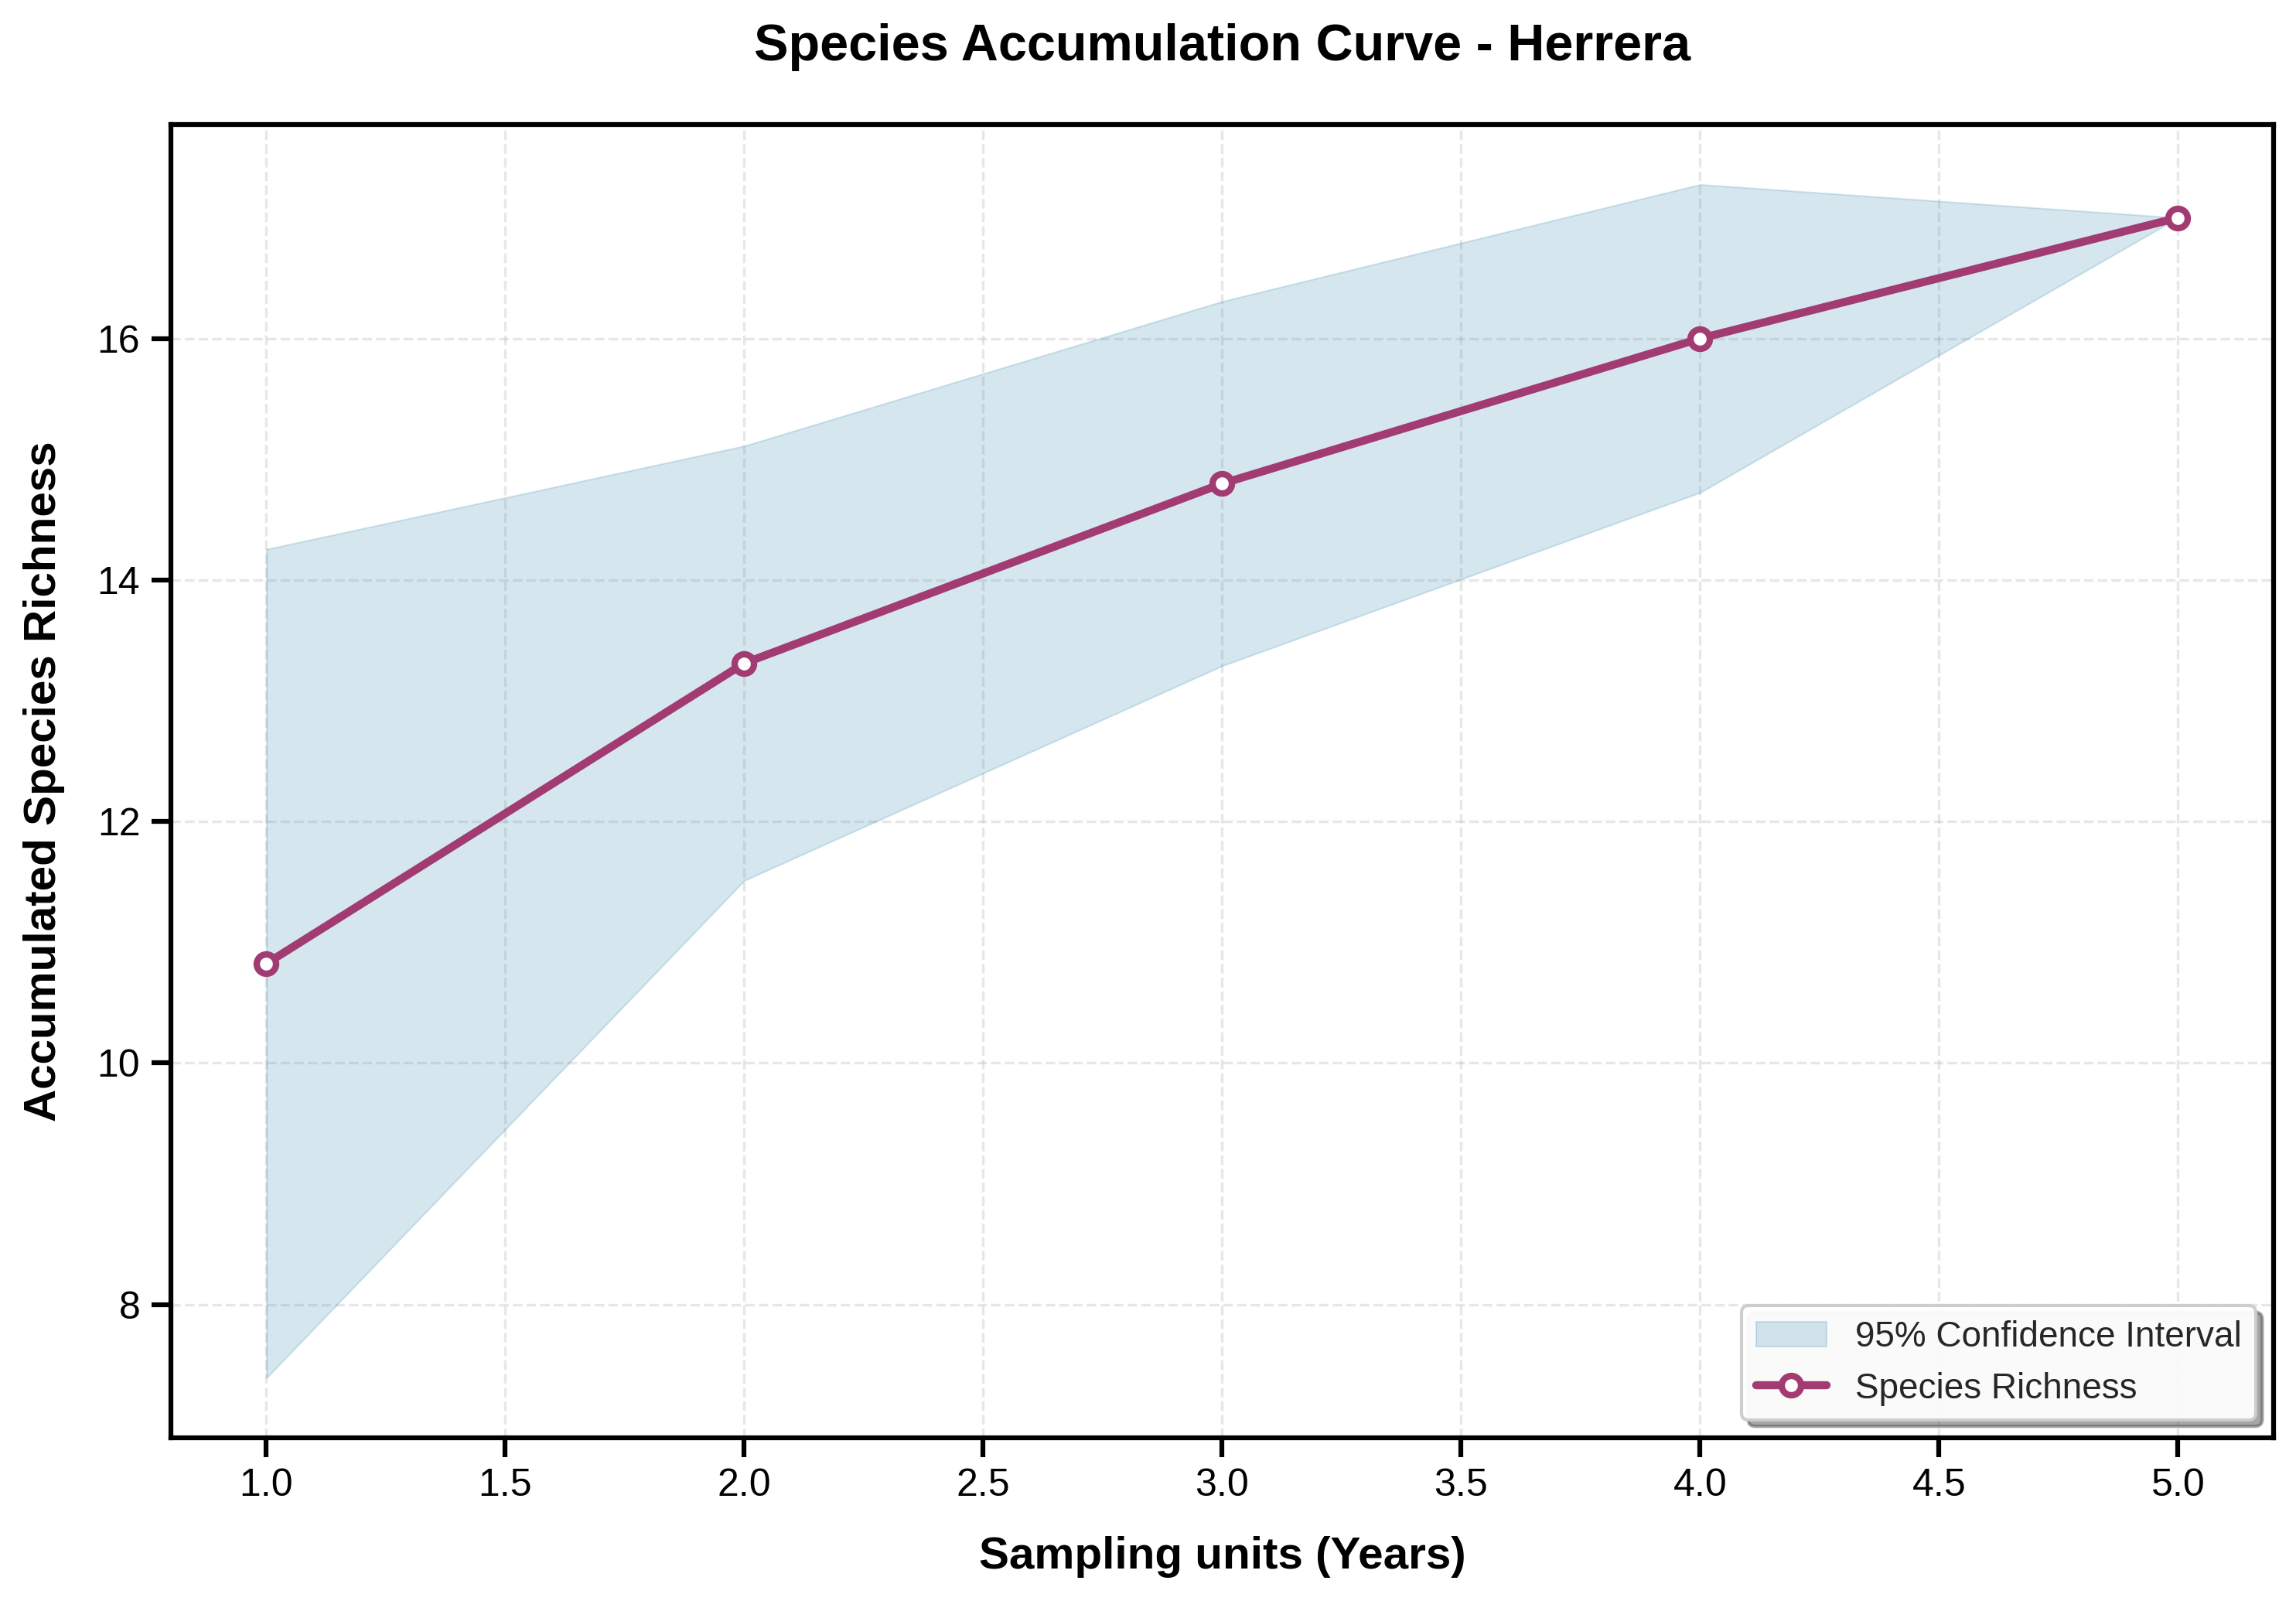

Observed richness: 17.0


In [12]:
# ----------------------------
# Temporal Species Accumulation Analysis
# ----------------------------
# Select array with most records (or manually override)
selected_array = df_arrays_5_years['Camera_Trap_Array'].value_counts().idxmax()
# selected_array = "Herrera"  # Manual override if needed

print(f"Selected Camera_Trap_Array: {selected_array}")

# Subset data to selected array
df_array = df_arrays_5_years[df_arrays_5_years['Camera_Trap_Array'] == selected_array]

# Create presence/absence matrix: rows = Years, columns = Species
mat_year = get_species_matrix(df_array, unit_col='Year', species_col='Sci_Name')

# Sort by year index for chronological collector curve
mat_year = mat_year.sort_index()

print(f"Matrix shape: {mat_year.shape}")

# Calculate randomized species accumulation curve (method='random')
# This represents expected richness when sampling years in random order
acc_rand_year = species_accumulation(mat_year, method='random', permutations=1000)

# Plot randomized accumulation curve
plot_sac(acc_rand_year,
         title=f"Species Accumulation Curve - {selected_array}",
         xlabel="Sampling units (Years)")

print(f"Observed richness: {acc_rand_year['richness'][-1]}")


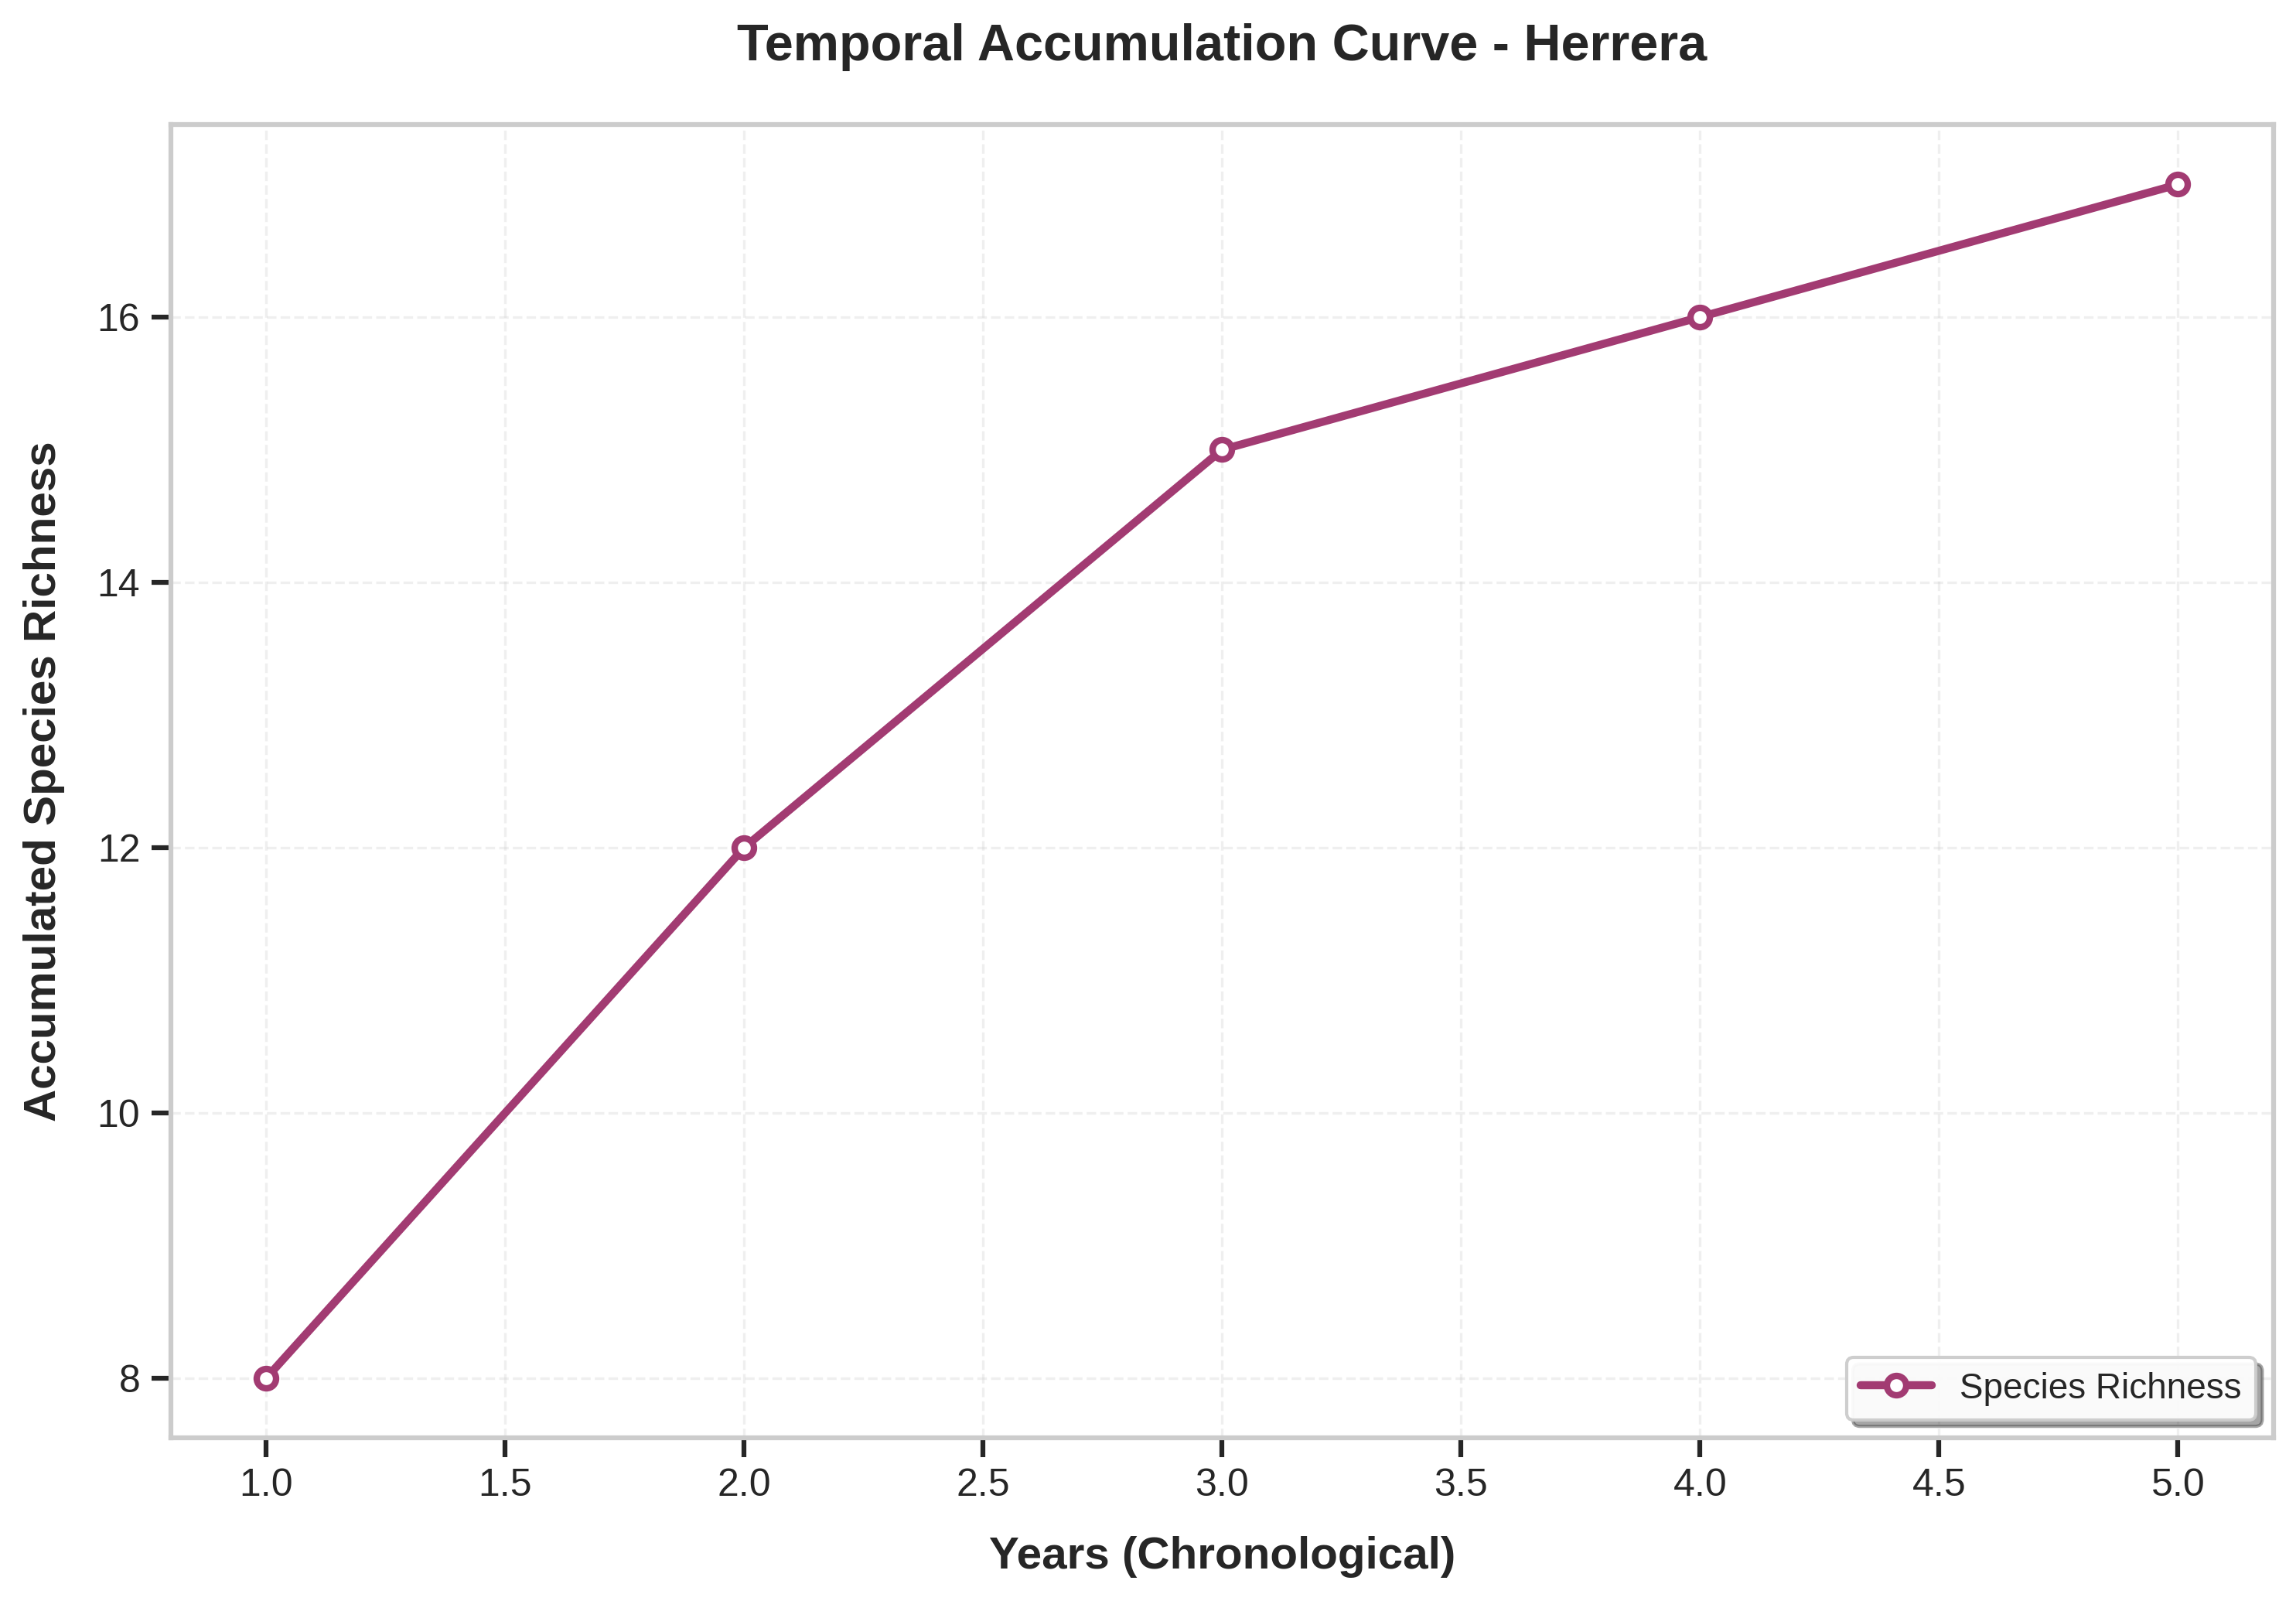

In [13]:
# ----------------------------
# Chronological Species Accumulation (Collector Curve)
# ----------------------------
# Calculate collector accumulation curve (method='collector')
# This shows actual species discovery in chronological order of years
acc_col_year = species_accumulation(mat_year, method='collector')

# Plot chronological accumulation curve
plot_sac(acc_col_year,
         title=f"Temporal Accumulation Curve - {selected_array}",
         xlabel="Years (Chronological)")


# Spatial biodiversity analysis (Snapshot USA arrays vs IUCN ranges)
This section builds array buffers, intersects with IUCN polygons, and generates spatial species accumulation curves.

In [14]:
import geopandas as gpd
import re

# ----------------------------
# Config
# ----------------------------
buffer_km = 5.0  # Centroid buffer: max distance defining an array
point_buffer_km = 1.0  # Point-buffer approach: individual buffer around each deployment
iucn_path = "../data/MAMMALS_TERRESTRIAL_ONLY/MAMMALS_TERRESTRIAL_ONLY.shp"

# ----------------------------
# Helpers
# ----------------------------
def _pick_column(columns, candidates):
    lower_map = {c.lower(): c for c in columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    return None

def _normalize_species(value):
    if value is None or (isinstance(value, float) and pd.isna(value)):
        return None
    text = str(value).strip()
    text = re.sub(r"\s+", " ", text).lower()
    return text


In [15]:
# ----------------------------
# Load IUCN species range data
# ----------------------------
# Read IUCN shapefile and ensure proper CRS (WGS84)
iucn = gpd.read_file(iucn_path)
if iucn.crs is None:
    iucn = iucn.set_crs("EPSG:4326")
else:
    iucn = iucn.to_crs("EPSG:4326")

# Clean geometries: remove null and fix invalid polygons
iucn = iucn[iucn.geometry.notnull()].copy()
if not iucn.is_valid.all():
    iucn["geometry"] = iucn.geometry.buffer(0)  # Fix invalid geometries


In [16]:
iucn.head(1)

id_no              sci_name  presence  origin  seasonal  \
0     18  Abrocoma boliviensis         1       1         1   

                                 compiler  yrcompiled  \
0  IUCN SSC Small Mammal Specialist Group        2016   

                                 citation subspecies subpop source island  \
0  IUCN SSC Small Mammal Specialist Group        NaN    NaN    NaN    NaN   

  tax_comm dist_comm  generalisd             legend   kingdom    phylum  \
0      NaN       NaN           0  Extant (resident)  ANIMALIA  CHORDATA   

      class    order_       family     genus category marine terrestria  \
0  MAMMALIA  RODENTIA  ABROCOMIDAE  Abrocoma       CR  false       true   

  freshwater  SHAPE_Leng  SHAPE_Area  \
0      false     0.30515     0.00552   

                                                                                                                                                                                                                                         geometry  
0  POLYGON ((-64.46864 -17.88625, -64.45733 -17.89669, -64.45733 -17.90799, -64.47212 -17.92539, -64.50083 -17.93061, -64.56172 -17.928, -64.57738 -17.91669, -64.58347 -17.89408, -64.57564 -17.8819, -64.53823 -17.87581, -64.46864 -17.88625))

In [17]:
# ----------------------------
# Align species naming between IUCN and Snapshot USA datasets
# ----------------------------
# Auto-detect IUCN species column
iucn_species_col = _pick_column(
    iucn.columns,
    ["SCI_NAME", "Sci_Name", "binomial", "scientific", "species", "Species"],
)
if iucn_species_col is None:
    raise ValueError("Could not detect IUCN species name column.")

# Normalize IUCN species names (lowercase, trimmed)
iucn["Sci_Name"] = iucn[iucn_species_col].map(_normalize_species)
iucn = iucn.dropna(subset=["Sci_Name"])
iucn = iucn[["Sci_Name", "geometry"]]

# Auto-detect Snapshot USA species column
df_species_col = _pick_column(
    df.columns,
    ["Sci_Name", "SciName", "Scientific_Name", "species", "Species"],
)
if df_species_col is None:
    raise ValueError("Could not detect Snapshot USA species column.")
if df_species_col != "Sci_Name":
    df["Sci_Name"] = df[df_species_col]

# Normalize Snapshot USA species names to match IUCN format
df["Sci_Name"] = df["Sci_Name"].map(_normalize_species)

print(f"IUCN species column: {iucn_species_col}")
print(f"Snapshot USA species column: {df_species_col}")
print(f"IUCN CRS: {iucn.crs}")
print(iucn["Sci_Name"].head())


IUCN species column: sci_name
Snapshot USA species column: Sci_Name
IUCN CRS: EPSG:4326
0    abrocoma boliviensis
1     acerodon celebensis
2     acerodon celebensis
3     acerodon celebensis
4     acerodon celebensis
Name: Sci_Name, dtype: str


In [18]:
# ----------------------------
# Create array buffers from camera trap coordinates
# ----------------------------
# Auto-detect coordinate and array columns
lat_col = _pick_column(df.columns, ["Latitude", "Lat", "GPS_Latitude", "Site_Latitude"])
lon_col = _pick_column(df.columns, ["Longitude", "Lon", "GPS_Longitude", "Site_Longitude"])
array_col = _pick_column(df.columns, ["Camera_Trap_Array", "Array", "Array_ID", "array"])

if lat_col is None or lon_col is None or array_col is None:
    raise ValueError("Missing required columns for lat/lon/array.")

# Clean coordinate data
df_points = df.dropna(subset=[lat_col, lon_col, array_col]).copy()
df_points[lat_col] = pd.to_numeric(df_points[lat_col], errors="coerce")
df_points[lon_col] = pd.to_numeric(df_points[lon_col], errors="coerce")
df_points = df_points.dropna(subset=[lat_col, lon_col])

# Validate coordinate ranges
in_range = df_points[lat_col].between(-90, 90) & df_points[lon_col].between(-180, 180)
df_points = df_points[in_range].copy()

# Auto-detect and fix swapped lat/lon columns (common data issue)
if df_points.empty:
    df_swap = df.dropna(subset=[lat_col, lon_col, array_col]).copy()
    df_swap[lat_col] = pd.to_numeric(df_swap[lat_col], errors="coerce")
    df_swap[lon_col] = pd.to_numeric(df_swap[lon_col], errors="coerce")
    df_swap = df_swap.dropna(subset=[lat_col, lon_col])
    swapped_ok = df_swap[lon_col].between(-90, 90) & df_swap[lat_col].between(-180, 180)
    df_swap = df_swap[swapped_ok].copy()
    if not df_swap.empty:
        df_points = df_swap.rename(columns={lat_col: "_lon", lon_col: "_lat"})
        df_points[lat_col] = df_points["_lat"]
        df_points[lon_col] = df_points["_lon"]
        df_points = df_points.drop(columns=["_lat", "_lon"])
        print("⚠️ Swapped lat/lon based on value ranges.")

if df_points.empty:
    raise ValueError("No valid coordinates after cleaning. Check lat/lon columns.")

df_points["point_id"] = df_points.index.astype(str)

# Create GeoDataFrame from camera trap points (WGS84)
gdf_points = gpd.GeoDataFrame(
    df_points,
    geometry=gpd.points_from_xy(df_points[lon_col], df_points[lat_col]),
    crs="EPSG:4326",
)

# Reproject to Web Mercator (meters) for accurate buffer calculation
gdf_points_m = gdf_points.to_crs(3857)

# Group points by array and compute centroid for each array
gdf_arrays_m = gdf_points_m.dissolve(by=array_col)
gdf_arrays_m["centroid"] = gdf_arrays_m.geometry.centroid

# Create circular buffers around array centroids
gdf_arrays_m = gdf_arrays_m.reset_index()  # Make array_col a column
gdf_arrays_m = gdf_arrays_m.set_geometry("centroid")
gdf_arrays_m["buffer"] = gdf_arrays_m.geometry.buffer(buffer_km * 1000.0)  # Convert km to meters

# Extract buffer geometries
gdf_buffers_m = gdf_arrays_m[[array_col, "buffer"]].copy()
gdf_buffers_m = gdf_buffers_m.set_geometry("buffer")
gdf_buffers_m = gdf_buffers_m.rename_geometry("geometry")
gdf_buffers_m.crs = 3857

# Remove invalid buffers
gdf_buffers_m = gdf_buffers_m[gdf_buffers_m.geometry.notnull() & ~gdf_buffers_m.geometry.is_empty].copy()

print(f"Arrays with valid buffers: {gdf_buffers_m.shape[0]}")
print(f"Buffer bounds (m): {gdf_buffers_m.total_bounds}")


Arrays with valid buffers: 261
Buffer bounds (m): [-16958410.41339935   2834498.16078025  -7636658.28965462
   8275383.47052454]


In [19]:
# ----------------------------
# Sanity checks (bounds and counts)
# ----------------------------
print(f"Points: {len(gdf_points)}")
print(f"IUCN polygons: {len(iucn)}")
print(f"Points bounds (WGS84): {gdf_points.total_bounds}")
print(f"IUCN bounds (WGS84): {iucn.total_bounds}")

Points: 698887
IUCN polygons: 12703
Points bounds (WGS84): [-152.37792      24.69486     -68.61159314   59.452635  ]
IUCN bounds (WGS84): [-179.999       -55.97946441  179.999        83.63410065]


In [20]:
# ----------------------------
# Joint Snapshot USA vs IUCN species table by array
# ----------------------------
# Snapshot USA: species detected per array
snapshot_array_species = (
    df_points[[array_col, "Sci_Name"]]
    .dropna(subset=[array_col, "Sci_Name"])
    .drop_duplicates()
    .rename(columns={array_col: "Array", "Sci_Name": "species"})
)
snapshot_array_species["in_snapshot"] = True

# IUCN: species predicted per array via buffer intersects
iucn_m = iucn.to_crs(3857)
iucn_m = iucn_m[iucn_m.geometry.notnull() & ~iucn_m.geometry.is_empty].copy()
iucn_in_buffers = gpd.sjoin(iucn_m, gdf_buffers_m, how="inner", predicate="intersects")
iucn_array_species = (
    iucn_in_buffers[[array_col, "Sci_Name"]]
    .dropna(subset=[array_col, "Sci_Name"])
    .drop_duplicates()
    .rename(columns={array_col: "Array", "Sci_Name": "species"})
)
iucn_array_species["in_iucn"] = True

# Full outer join to see overlap vs uniques
joint_df = snapshot_array_species.merge(
    iucn_array_species,
    on=["Array", "species"],
    how="outer",
    sort=True,
)
joint_df["in_snapshot"] = joint_df["in_snapshot"].fillna(False)
joint_df["in_iucn"] = joint_df["in_iucn"].fillna(False)

# Flag categories
joint_df["category"] = np.select(
    [
        joint_df["in_snapshot"] & joint_df["in_iucn"],
        joint_df["in_snapshot"] & ~joint_df["in_iucn"],
        ~joint_df["in_snapshot"] & joint_df["in_iucn"],
    ],
    ["both", "snapshot_only", "iucn_only"],
    default="unknown",
)

# Summaries per array (sets and counts)
array_summary = (
    joint_df.groupby("Array")
    .apply(
        lambda g: pd.Series({
            "shared_species": sorted(g.loc[g["category"] == "both", "species"].unique().tolist()),
            "snapshot_only": sorted(g.loc[g["category"] == "snapshot_only", "species"].unique().tolist()),
            "iucn_only": sorted(g.loc[g["category"] == "iucn_only", "species"].unique().tolist()),
            "n_shared": int((g["category"] == "both").sum()),
            "n_snapshot_only": int((g["category"] == "snapshot_only").sum()),
            "n_iucn_only": int((g["category"] == "iucn_only").sum()),
        })
    )
    .reset_index()
)

# Quick look
print("Joint table rows:", len(joint_df))
display(joint_df.head())

Joint table rows: 12687


Array               species in_snapshot in_iucn   category
0  ARNWR    blarina brevicauda       False    True  iucn_only
1  ARNWR  blarina carolinensis       False    True  iucn_only
2  ARNWR         canis latrans        True    True       both
3  ARNWR           canis rufus        True    True       both
4  ARNWR    condylura cristata       False    True  iucn_only

In [21]:
# ----------------------------
# Check cleaned-out Snapshot USA species vs IUCN presence
# ----------------------------
# From DataCleaning.ipynb (species removed from Snapshot USA)
species_removed_snapshot = [
    # Non-native / low data (scientific names)
    'boselaphus tragocamelus', 'lama glama', 'lariscus insignis',
    'oryx gazella', 'urva javanica', 'sus scrofa',
    # Domestic / commensal species (scientific names only)
    'canis lupus familiaris', 'felis catus', 'bos taurus', 'equus caballus',
    'ovis aries', 'sus scrofa domesticus', 'capra hircus', 'equus asinus',
    'rattus norvegicus', 'rattus rattus', 'mus musculus',
]

# Normalize lists and IUCN names
removed_df = pd.DataFrame({"species": species_removed_snapshot}).drop_duplicates()
removed_df["species_norm"] = removed_df["species"].str.lower().str.strip()
iucn_species_norm = iucn["Sci_Name"].dropna().astype(str).str.lower().str.strip()
iucn_species_set = set(iucn_species_norm)
removed_df["in_iucn_global"] = removed_df["species_norm"].isin(iucn_species_set)

# If available, check in which arrays these occur (IUCN range intersects arrays)
if "iucn_in_buffers" not in globals():
    iucn_m = iucn.to_crs(3857)
    iucn_m = iucn_m[iucn_m.geometry.notnull() & ~iucn_m.geometry.is_empty].copy()
    iucn_in_buffers = gpd.sjoin(iucn_m, gdf_buffers_m, how="inner", predicate="intersects")

iucn_in_buffers = iucn_in_buffers.copy()
iucn_in_buffers["species_norm"] = iucn_in_buffers["Sci_Name"].astype(str).str.lower().str.strip()
arrays_by_species = (
    iucn_in_buffers.groupby("species_norm")[array_col]
    .unique()
    .to_dict()
)

removed_df["arrays_iucn"] = removed_df["species_norm"].map(
    lambda s: sorted(arrays_by_species.get(s, []))
 )
removed_df["n_arrays_iucn"] = removed_df["arrays_iucn"].apply(len)
removed_df["in_iucn_buffers"] = removed_df["n_arrays_iucn"] > 0

# Display results
display(removed_df[["species", "in_iucn_global", "in_iucn_buffers", "n_arrays_iucn", "arrays_iucn"]])

species  in_iucn_global  in_iucn_buffers  n_arrays_iucn  \
0   boselaphus tragocamelus            True            False              0   
1                lama glama           False            False              0   
2         lariscus insignis            True            False              0   
3              oryx gazella            True            False              0   
4             urva javanica            True            False              0   
5                sus scrofa            True            False              0   
6    canis lupus familiaris           False            False              0   
7               felis catus           False            False              0   
8                bos taurus           False            False              0   
9            equus caballus           False            False              0   
10               ovis aries           False            False              0   
11    sus scrofa domesticus           False            False              0   
12             capra hircus           False            False              0   
13             equus asinus           False            False              0   
14        rattus norvegicus            True            False              0   
15            rattus rattus            True            False              0   
16             mus musculus            True             True            261   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           arrays_iucn  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   []  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [22]:
# ----------------------------
# Remove cleaned-out species from IUCN
# ----------------------------
# Build normalized removal set
species_removed_snapshot_set = set(
    pd.Series(species_removed_snapshot).str.lower().str.strip().dropna().tolist()
)

# Filter IUCN GeoDataFrame in place
iucn = iucn[~iucn["Sci_Name"].astype(str).str.lower().str.strip().isin(species_removed_snapshot_set)].copy()

# If buffers already computed, filter them too
if "iucn_in_buffers" in globals():
    iucn_in_buffers = iucn_in_buffers[
        ~iucn_in_buffers["Sci_Name"].astype(str).str.lower().str.strip().isin(species_removed_snapshot_set)
    ].copy()

# If array-level matrix already computed, update it
if "array_species_iucn" in globals():
    array_species_iucn = array_species_iucn.loc[:, ~array_species_iucn.columns.str.lower().isin(species_removed_snapshot_set)].copy()
    print(f"Updated array_species_iucn after removal: {array_species_iucn.shape}")

print(f"IUCN species after removal: {iucn['Sci_Name'].nunique()}")

IUCN species after removal: 5675


In [23]:
# ----------------------------
# Prepare observed species matrix (Snapshot USA detections by array)
# ----------------------------
# Use actual camera trap detections grouped by array
array_species_observed = get_species_matrix(df_points, unit_col=array_col, species_col="Sci_Name")

print(f"Arrays with detections: {array_species_observed.shape[0]}")
print(f"Unique observed species: {array_species_observed.shape[1]}")

Arrays with detections: 261
Unique observed species: 113


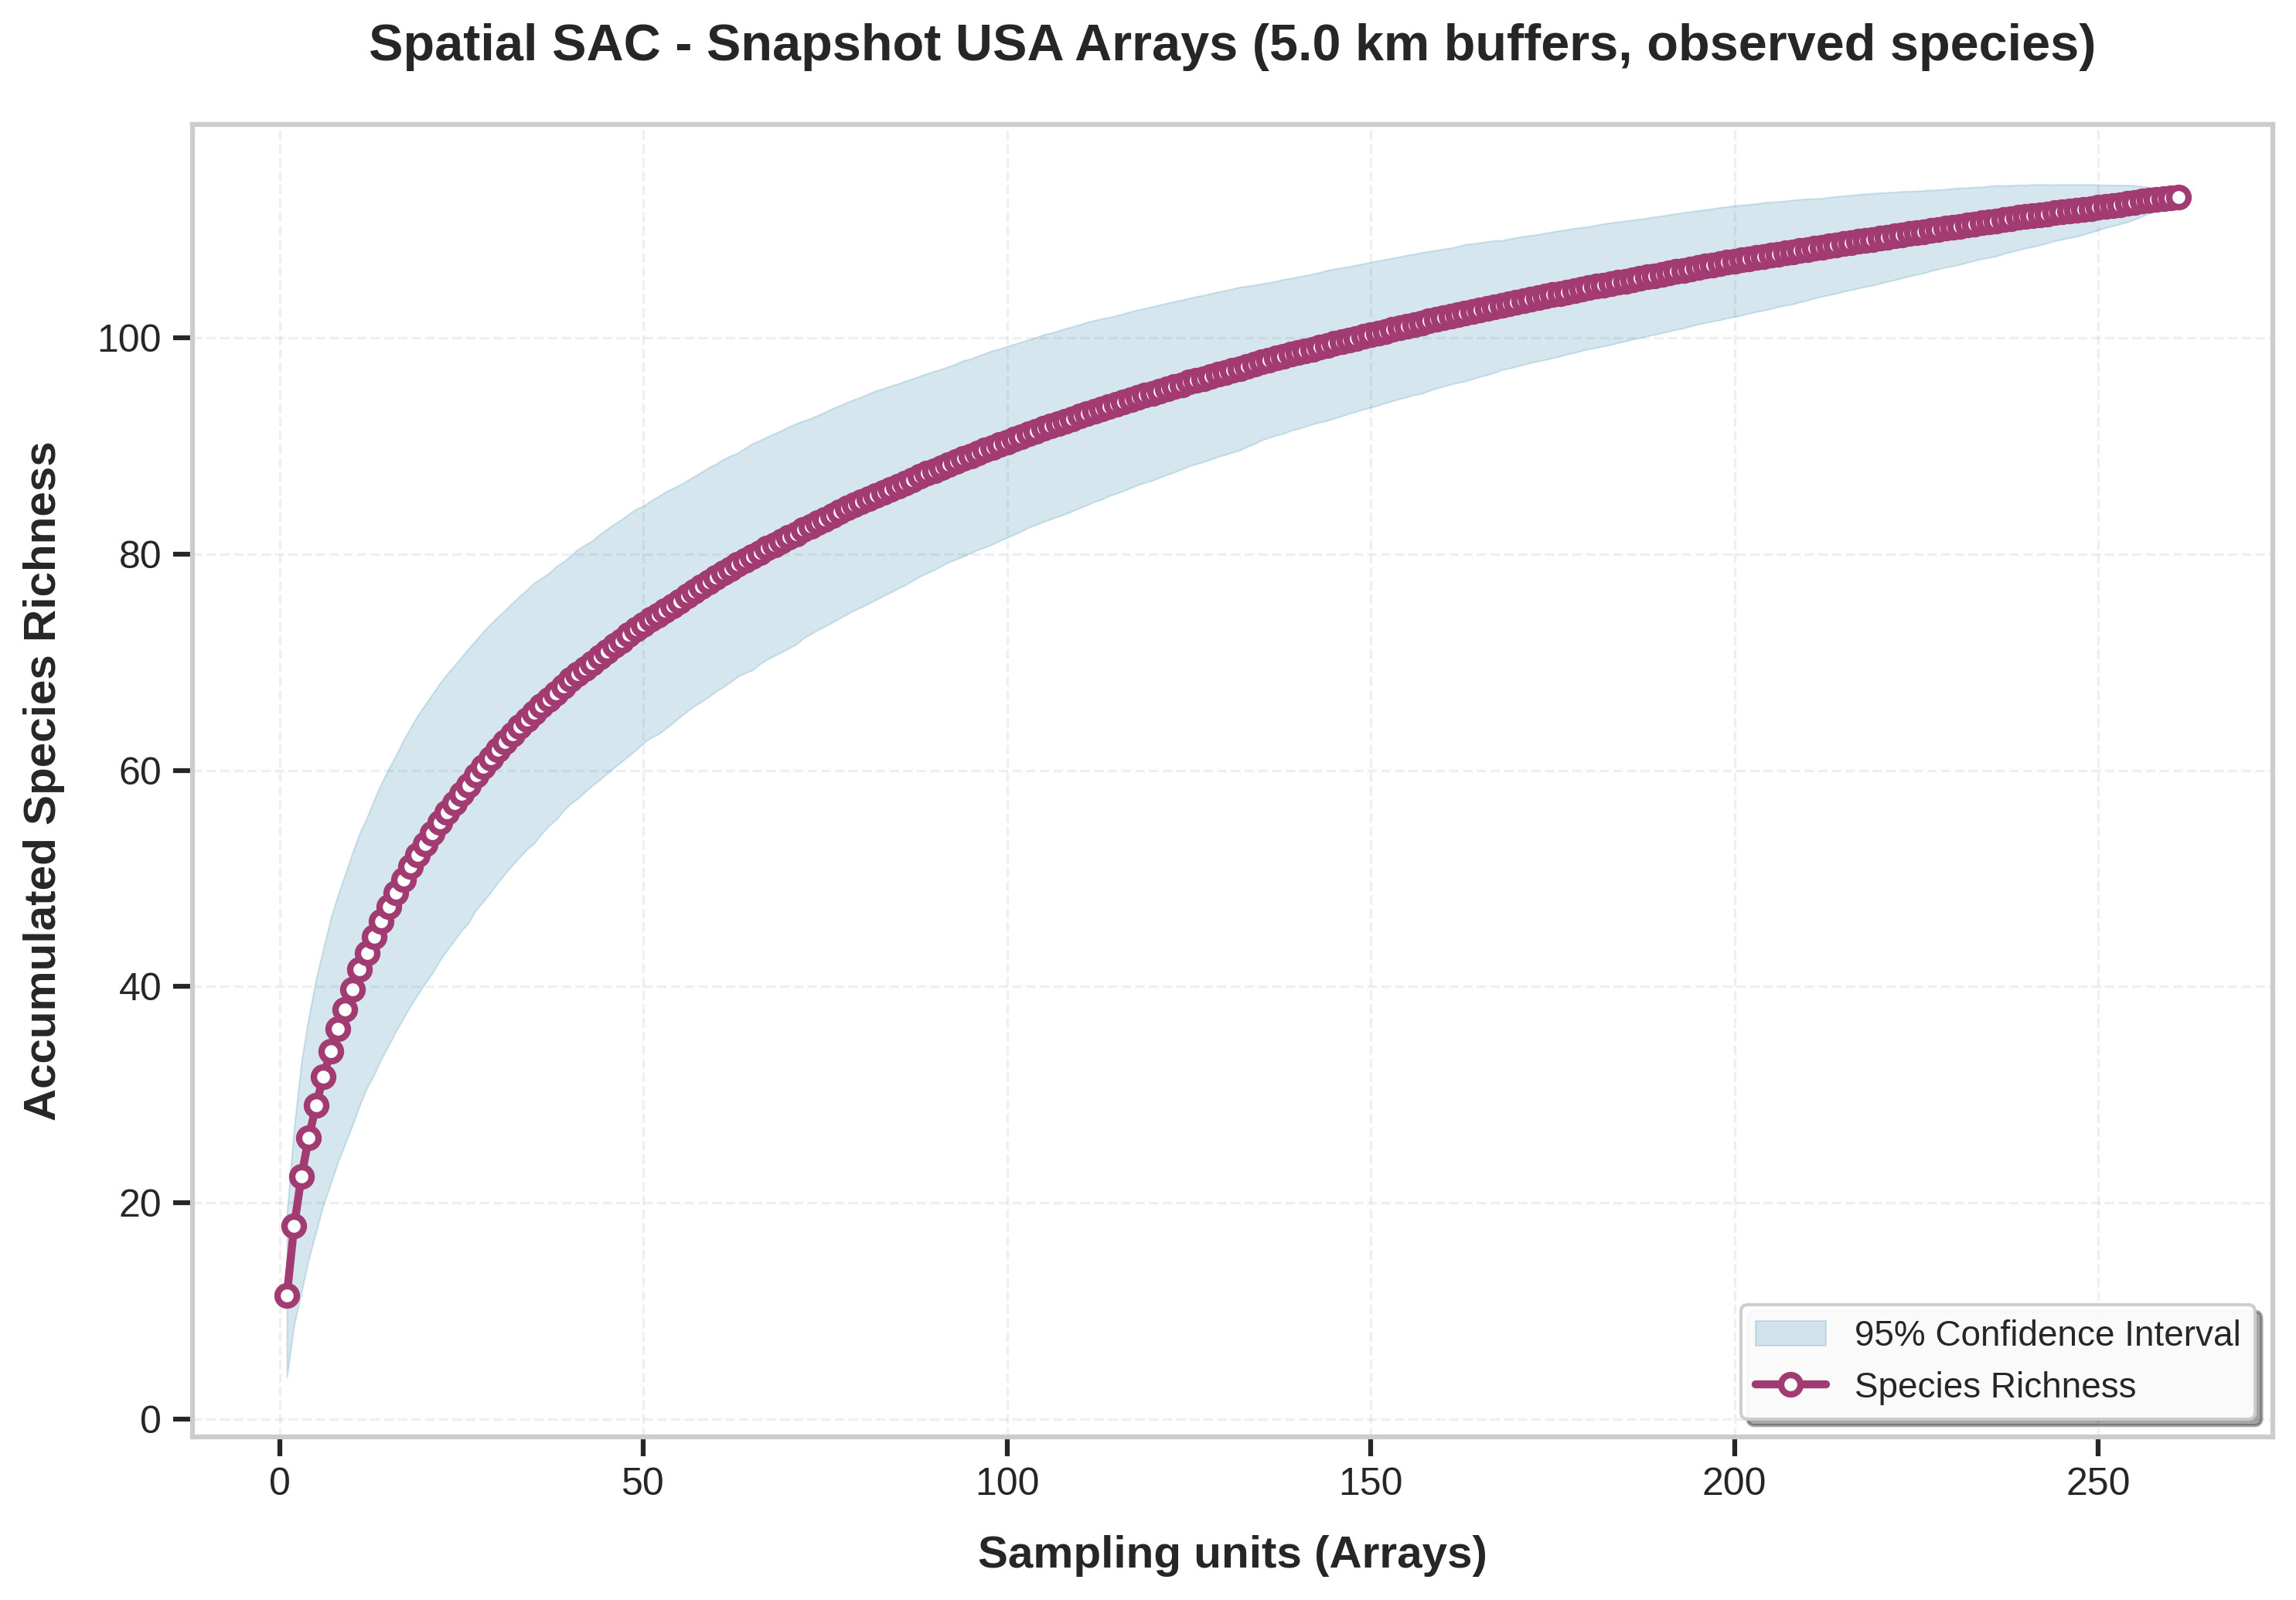

In [24]:
# ----------------------------
# SAC Scenario 1: Arrays as sampling units (observed species only)
# ----------------------------
acc_arrays = species_accumulation(array_species_observed, method="random", permutations=1000)
plot_sac(
    acc_arrays,
    title=f"Spatial SAC - Snapshot USA Arrays ({buffer_km} km buffers, observed species)",
    xlabel="Sampling units (Arrays)",
)

Array buffers: 261, IUCN polygons: 12648
Buffers bounds (m): [-16958410.41339935   2834498.16078025  -7636658.28965462
   8275383.47052454]
IUCN bounds (m): [-20037397.02329845  -7554328.68601035  20037397.02329845
  18428920.01295002]
Arrays with IUCN species predictions: 260
Unique IUCN-predicted species: 298


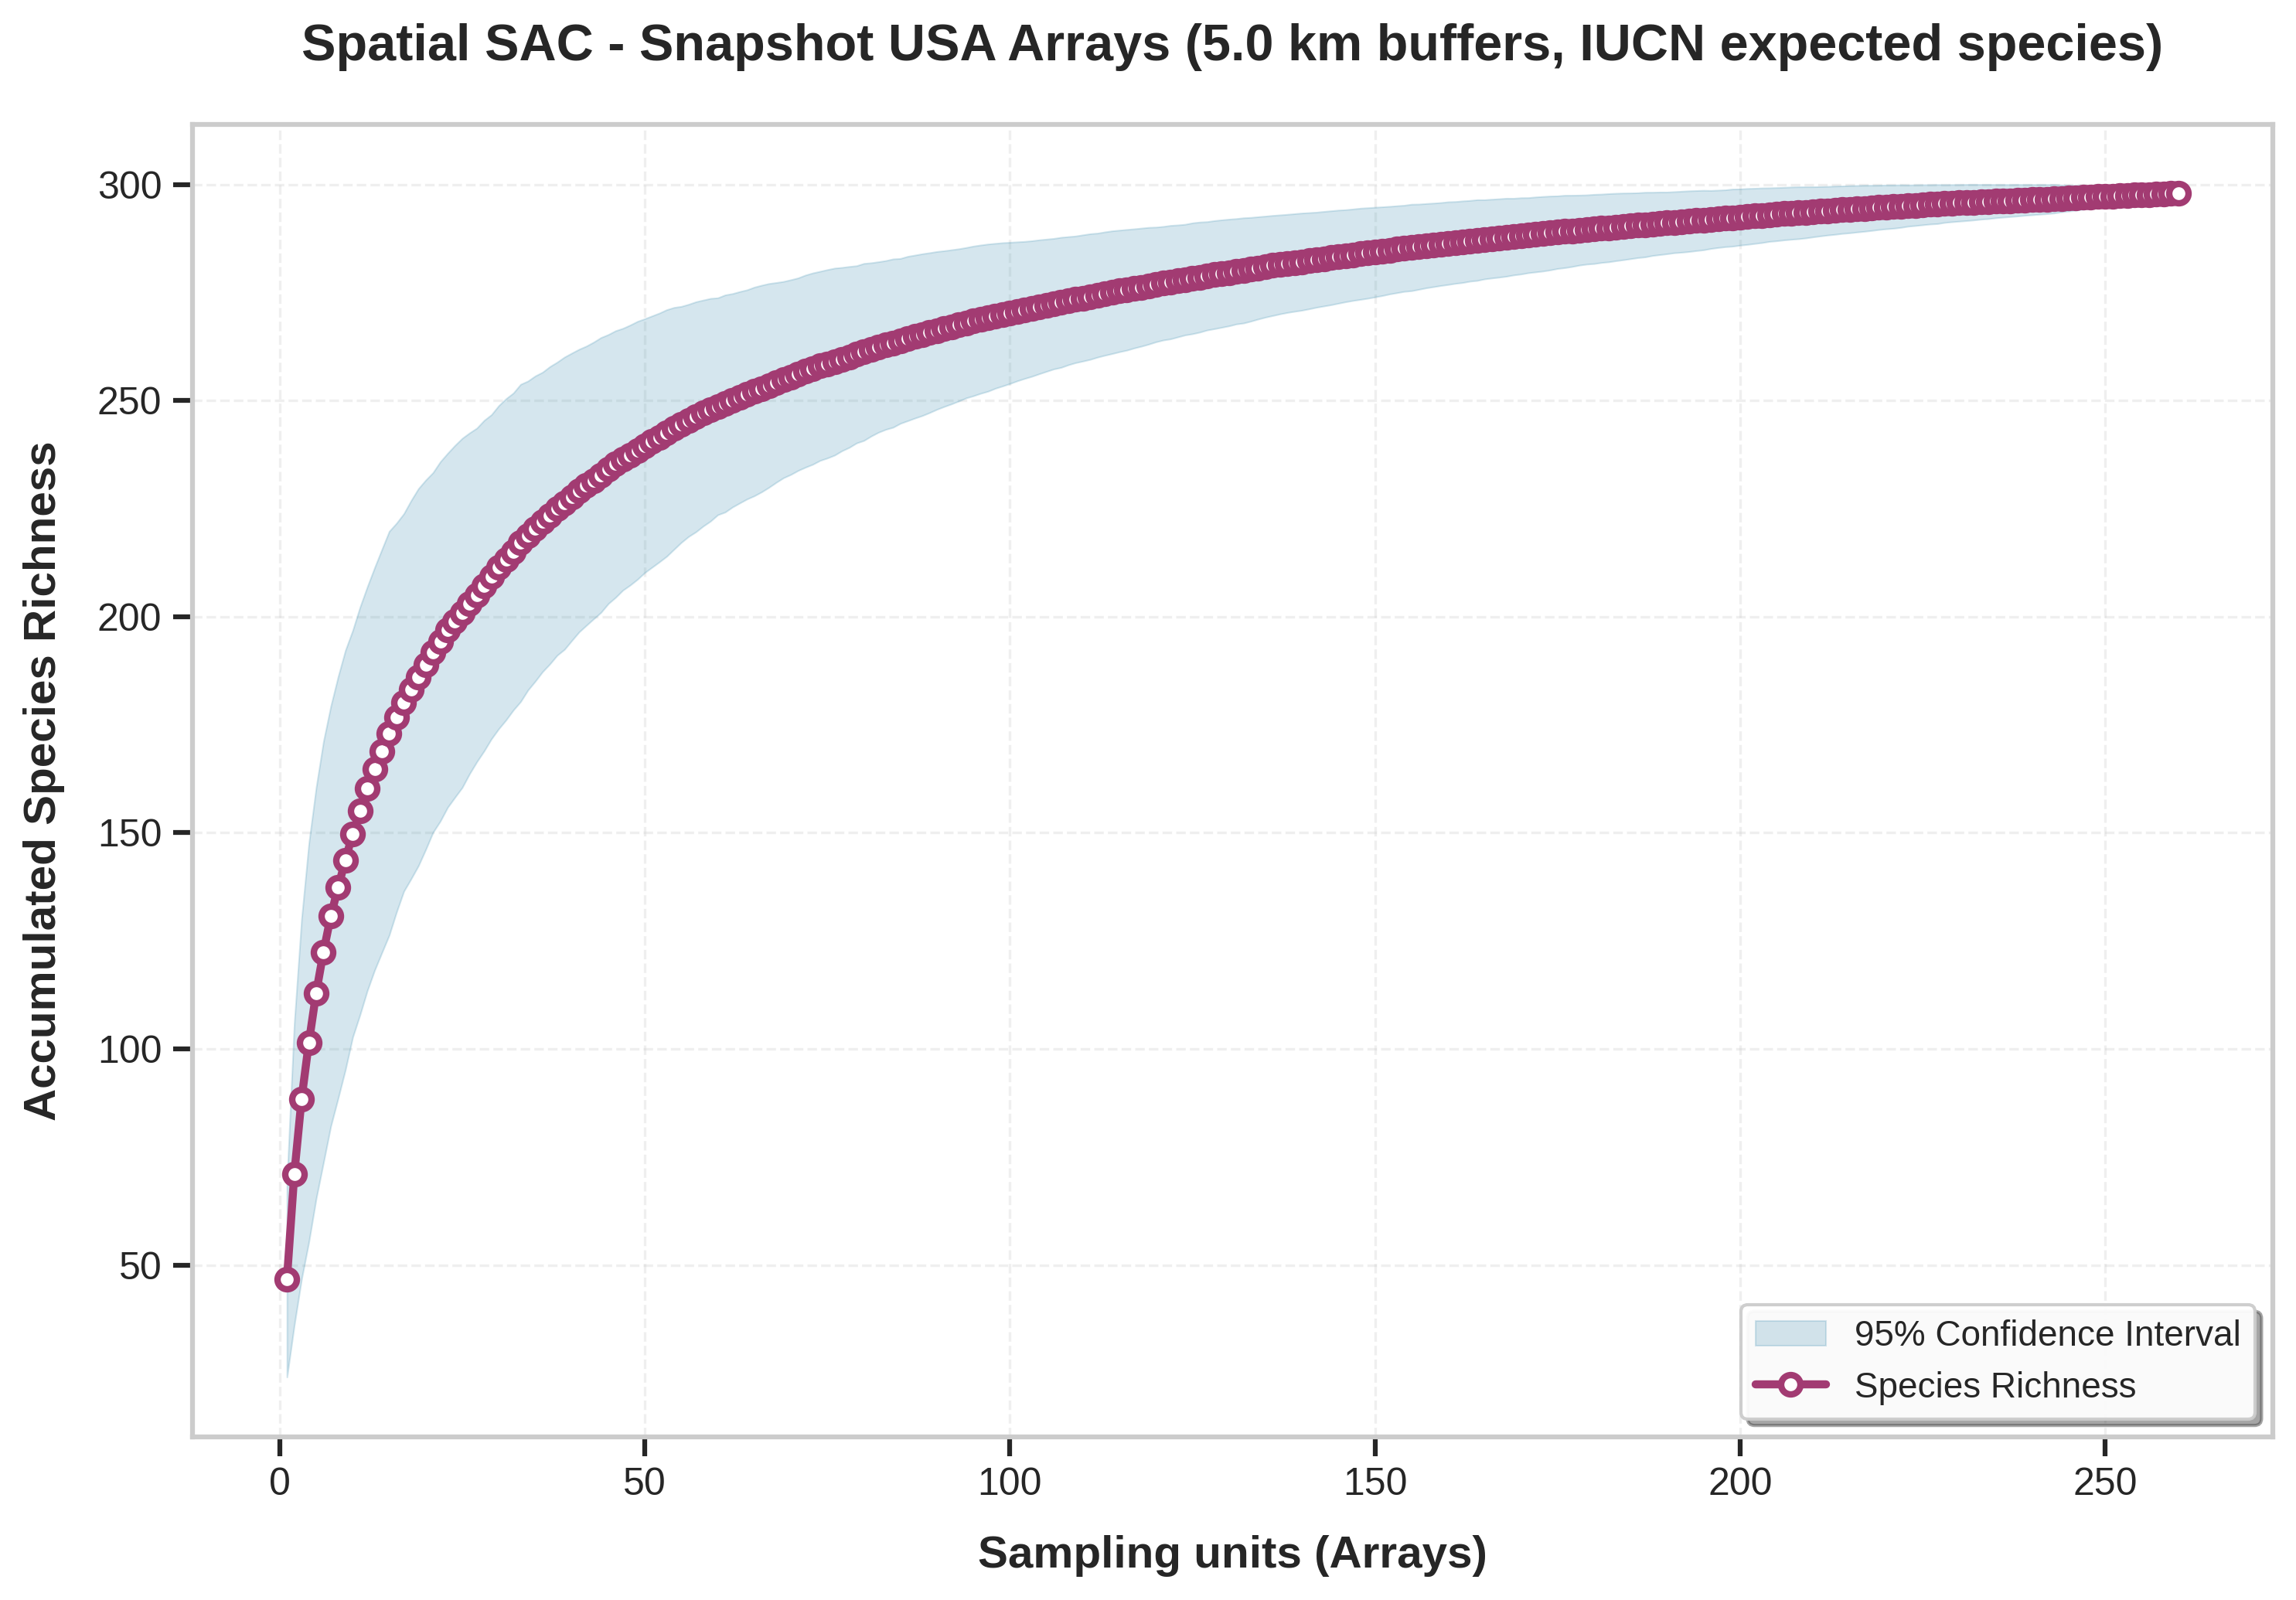

In [25]:
# ----------------------------
# SAC Scenario 2: IUCN-predicted species richness by array
# ----------------------------
# Reproject IUCN to meters for spatial join
iucn_m = iucn.to_crs(3857)
iucn_m = iucn_m[iucn_m.geometry.notnull() & ~iucn_m.geometry.is_empty].copy()

print(f"Array buffers: {len(gdf_buffers_m)}, IUCN polygons: {len(iucn_m)}")
print(f"Buffers bounds (m): {gdf_buffers_m.total_bounds}")
print(f"IUCN bounds (m): {iucn_m.total_bounds}")

# Spatial join: Find which IUCN species ranges intersect each array buffer
iucn_in_buffers = gpd.sjoin(iucn_m, gdf_buffers_m, how="inner", predicate="intersects")
if iucn_in_buffers.empty:
    raise ValueError("No IUCN polygons intersected the array buffers.")

# Reset index to avoid duplicate labels
iucn_in_buffers = iucn_in_buffers.reset_index(drop=True)

# Build presence/absence matrix (arrays x IUCN-predicted species)
array_species_iucn = pd.crosstab(iucn_in_buffers[array_col], iucn_in_buffers["Sci_Name"])
array_species_iucn = (array_species_iucn > 0).astype(int)

print(f"Arrays with IUCN species predictions: {array_species_iucn.shape[0]}")
print(f"Unique IUCN-predicted species: {array_species_iucn.shape[1]}")

# Calculate species accumulation for IUCN-predicted species
acc_arrays_iucn = species_accumulation(array_species_iucn, method="random", permutations=1000)
plot_sac(
    acc_arrays_iucn,
    title=f"Spatial SAC - Snapshot USA Arrays ({buffer_km} km buffers, IUCN expected species)",
    xlabel="Sampling units (Arrays)",
)


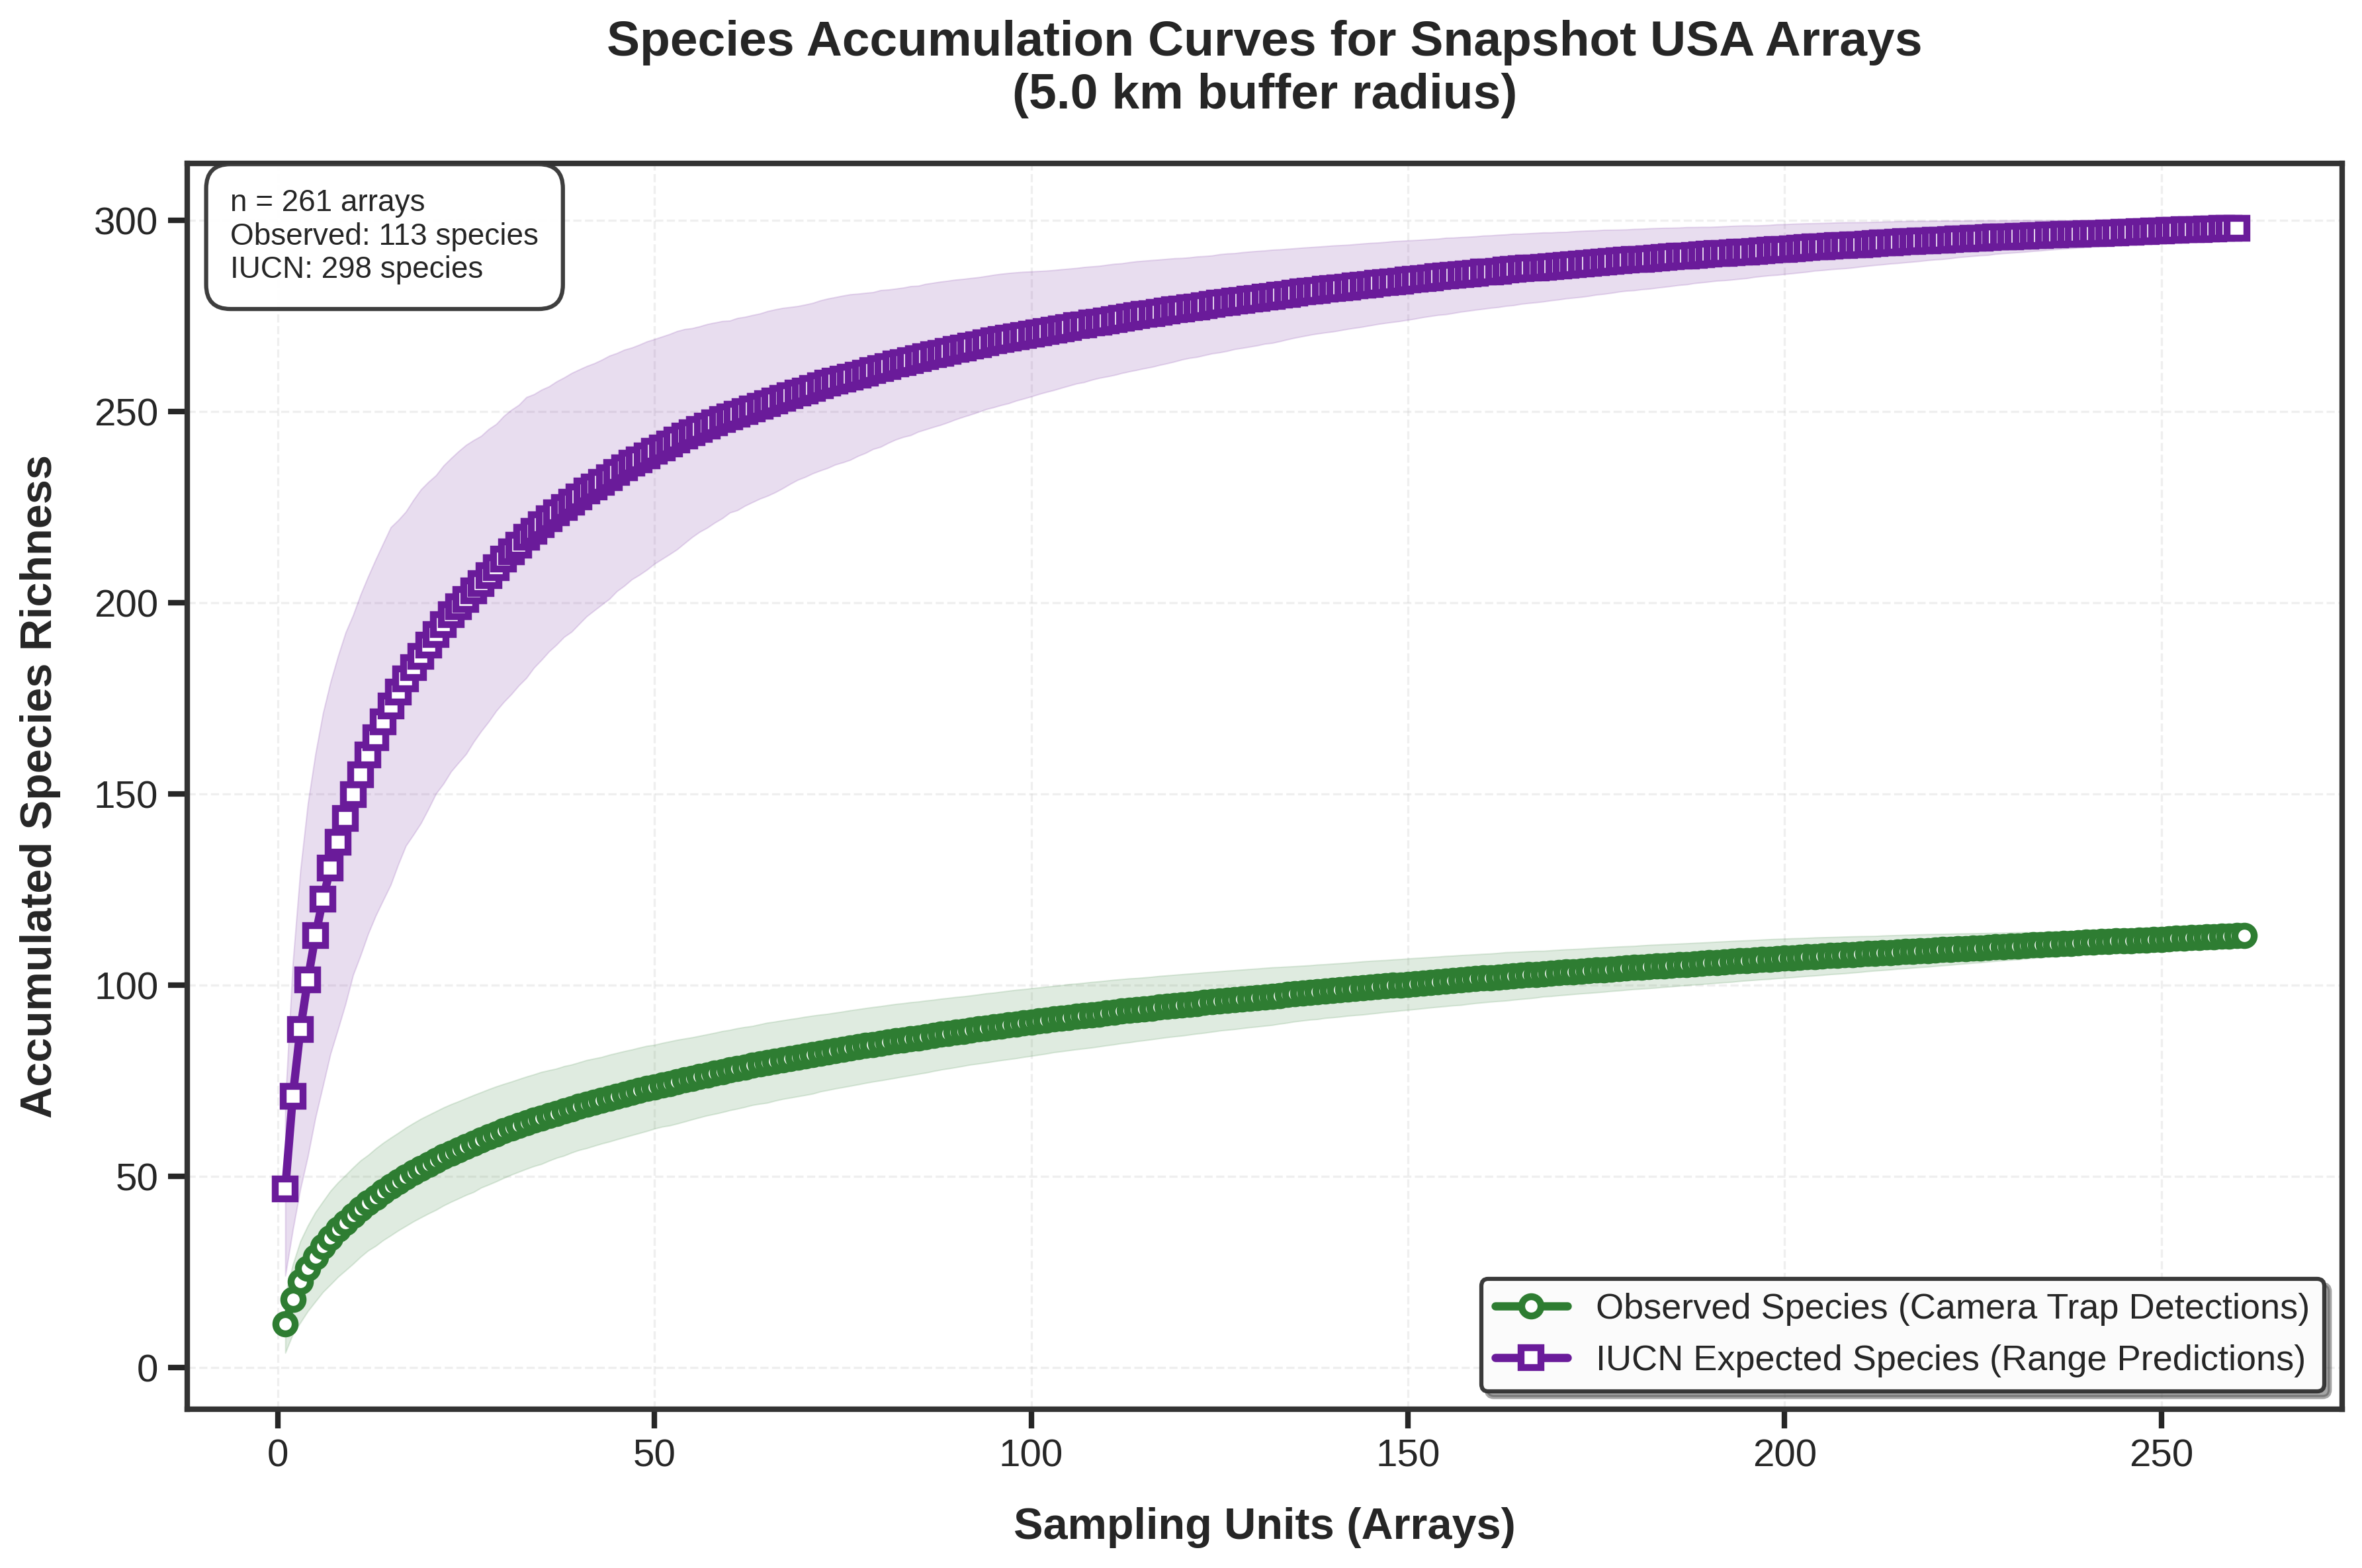


SUMMARY STATISTICS
Sampling units (arrays): 261
Buffer radius: 5.0 km

Observed Species (Camera Trap Detections):
  Total richness: 113
  Final SD: 0.00

IUCN Expected Species (Range Maps):
  Total richness: 298
  Final SD: 0.00

Detection Gap (IUCN - Observed): 185 species


In [26]:
# ----------------------------
# Combined SAC Plot: Observed vs IUCN-predicted Species
# ----------------------------
# Create publication-quality figure comparing detection-based vs range-based richness
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
plt.style.use('seaborn-v0_8-whitegrid')

# Scenario 1: Observed species from camera trap detections (green)
x1 = acc_arrays['sites']
y1 = acc_arrays['richness']
sd1 = acc_arrays['sd']

# Plot 95% confidence interval for observed species
if sd1 is not None and np.any(sd1 > 0):
    ax.fill_between(x1, y1 - 2*sd1, y1 + 2*sd1,
                    color='#2E7D32', alpha=0.15,
                    edgecolor='#2E7D32', linewidth=0.5)

# Plot mean accumulation curve for observed species
ax.plot(x1, y1, color='#2E7D32', linewidth=3,
        marker='o', markersize=7, markerfacecolor='white',
        markeredgewidth=2.5, markeredgecolor='#2E7D32',
        label='Observed Species (Camera Trap Detections)', zorder=3)

# Scenario 2: IUCN-predicted species from range maps (purple)
x2 = acc_arrays_iucn['sites']
y2 = acc_arrays_iucn['richness']
sd2 = acc_arrays_iucn['sd']

# Plot 95% confidence interval for IUCN predictions
if sd2 is not None and np.any(sd2 > 0):
    ax.fill_between(x2, y2 - 2*sd2, y2 + 2*sd2,
                    color='#6A1B9A', alpha=0.15,
                    edgecolor='#6A1B9A', linewidth=0.5)

# Plot mean accumulation curve for IUCN predictions
ax.plot(x2, y2, color='#6A1B9A', linewidth=3,
        marker='s', markersize=7, markerfacecolor='white',
        markeredgewidth=2.5, markeredgecolor='#6A1B9A',
        label='IUCN Expected Species (Range Predictions)', zorder=3)

# Configure grid
ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.8, zorder=0)
ax.set_axisbelow(True)

# Axis labels and title
ax.set_xlabel('Sampling Units (Arrays)', fontsize=16, fontweight='bold', labelpad=12)
ax.set_ylabel('Accumulated Species Richness', fontsize=16, fontweight='bold', labelpad=12)
ax.set_title(f'Species Accumulation Curves for Snapshot USA Arrays\n({buffer_km} km buffer radius)',
            fontsize=18, fontweight='bold', pad=20)

# Format tick marks
ax.tick_params(axis='both', which='major', labelsize=14, length=7, width=2)

# Add legend
legend = ax.legend(loc='lower right', frameon=True, fancybox=True,
                   shadow=True, fontsize=13, framealpha=0.97,
                   edgecolor='#333333', facecolor='white')
legend.get_frame().set_linewidth(1.5)

# Format plot borders
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('#333333')

# Add sample size and richness annotation
textstr = f'n = {array_species_observed.shape[0]} arrays\nObserved: {array_species_observed.shape[1]} species\nIUCN: {array_species_iucn.shape[1]} species'
props = dict(boxstyle='round,pad=0.8', facecolor='white', edgecolor='#333333', linewidth=1.5, alpha=0.95)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"Sampling units (arrays): {array_species_observed.shape[0]}")
print(f"Buffer radius: {buffer_km} km")
print(f"\nObserved Species (Camera Trap Detections):")
print(f"  Total richness: {acc_arrays['richness'][-1]:.0f}")
print(f"  Final SD: {acc_arrays['sd'][-1]:.2f}")
print(f"\nIUCN Expected Species (Range Maps):")
print(f"  Total richness: {acc_arrays_iucn['richness'][-1]:.0f}")
print(f"  Final SD: {acc_arrays_iucn['sd'][-1]:.2f}")
print(f"\nDetection Gap (IUCN - Observed): {acc_arrays_iucn['richness'][-1] - acc_arrays['richness'][-1]:.0f} species")
print("="*60)


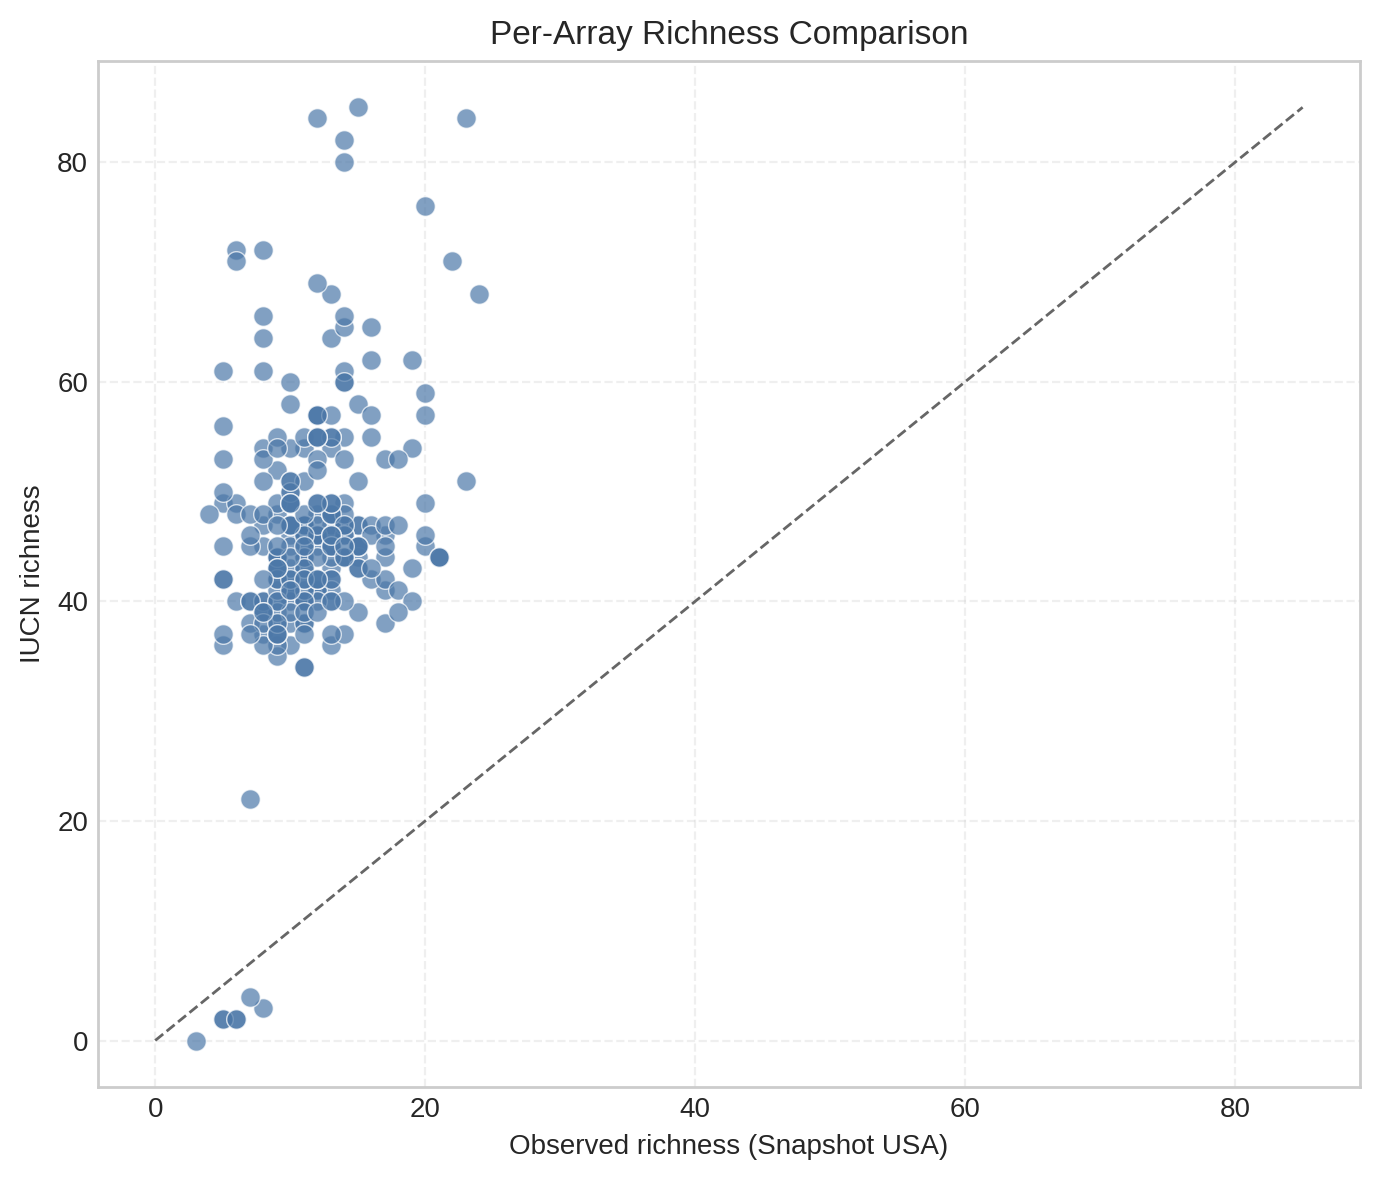

snapshot_richness  iucn_richness
Camera_Trap_Array                                  
ARNWR                             10           36.0
AandM                              9           44.0
Abilene                           14           44.0
AbitaFlats                         6           40.0
Afognak                            8            3.0

In [27]:
# ----------------------------
# Plot richness per array: Snapshot vs IUCN (scatter)
# ----------------------------
# Compute richness per array
snapshot_richness = array_species_observed.sum(axis=1).rename("snapshot_richness")
iucn_richness = array_species_iucn.sum(axis=1).rename("iucn_richness")

# Combine into one table
richness_by_array = pd.concat([snapshot_richness, iucn_richness], axis=1).fillna(0)

# Scatter plot: observed vs IUCN
fig, ax = plt.subplots(figsize=(7, 6), dpi=200)
ax.scatter(
    richness_by_array["snapshot_richness"],
    richness_by_array["iucn_richness"],
    s=50,
    alpha=0.7,
    color="#4C78A8",
    edgecolor="white",
    linewidth=0.5,
 )

# 1:1 reference line
min_val = min(richness_by_array.min())
max_val = max(richness_by_array.max())
ax.plot([min_val, max_val], [min_val, max_val], linestyle="--", color="#666666", linewidth=1)

ax.set_xlabel("Observed richness (Snapshot USA)")
ax.set_ylabel("IUCN richness")
ax.set_title("Per-Array Richness Comparison")
ax.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

display(richness_by_array.head())

DISTANCE ANALYSIS: CAMERA DEPLOYMENTS TO ARRAY CENTROIDS
Total deployment cameras analyzed: 698,887
Number of arrays: 261

Distance Statistics (km):
  Mean:     4.130 km
  Median:   1.594 km
  Std Dev:  14.670 km
  Min:      0.001 km
  Max:      625.660 km

Percentiles:
  25th:     0.754 km
  50th:     1.594 km
  75th:     3.873 km
  95th:     15.316 km
  99th:     21.674 km

5.0 km Buffer Validation:
  Cameras within 5.0 km: 553,935 (79.26%)
  Cameras beyond 5.0 km: 144,952 (20.74%)

Coverage by Different Buffer Sizes:
    2.5 km: 450,544 cameras ( 64.47%)
    5.0 km: 553,935 cameras ( 79.26%)
    7.5 km: 598,413 cameras ( 85.62%)
   10.0 km: 623,248 cameras ( 89.18%)
   15.0 km: 661,554 cameras ( 94.66%)


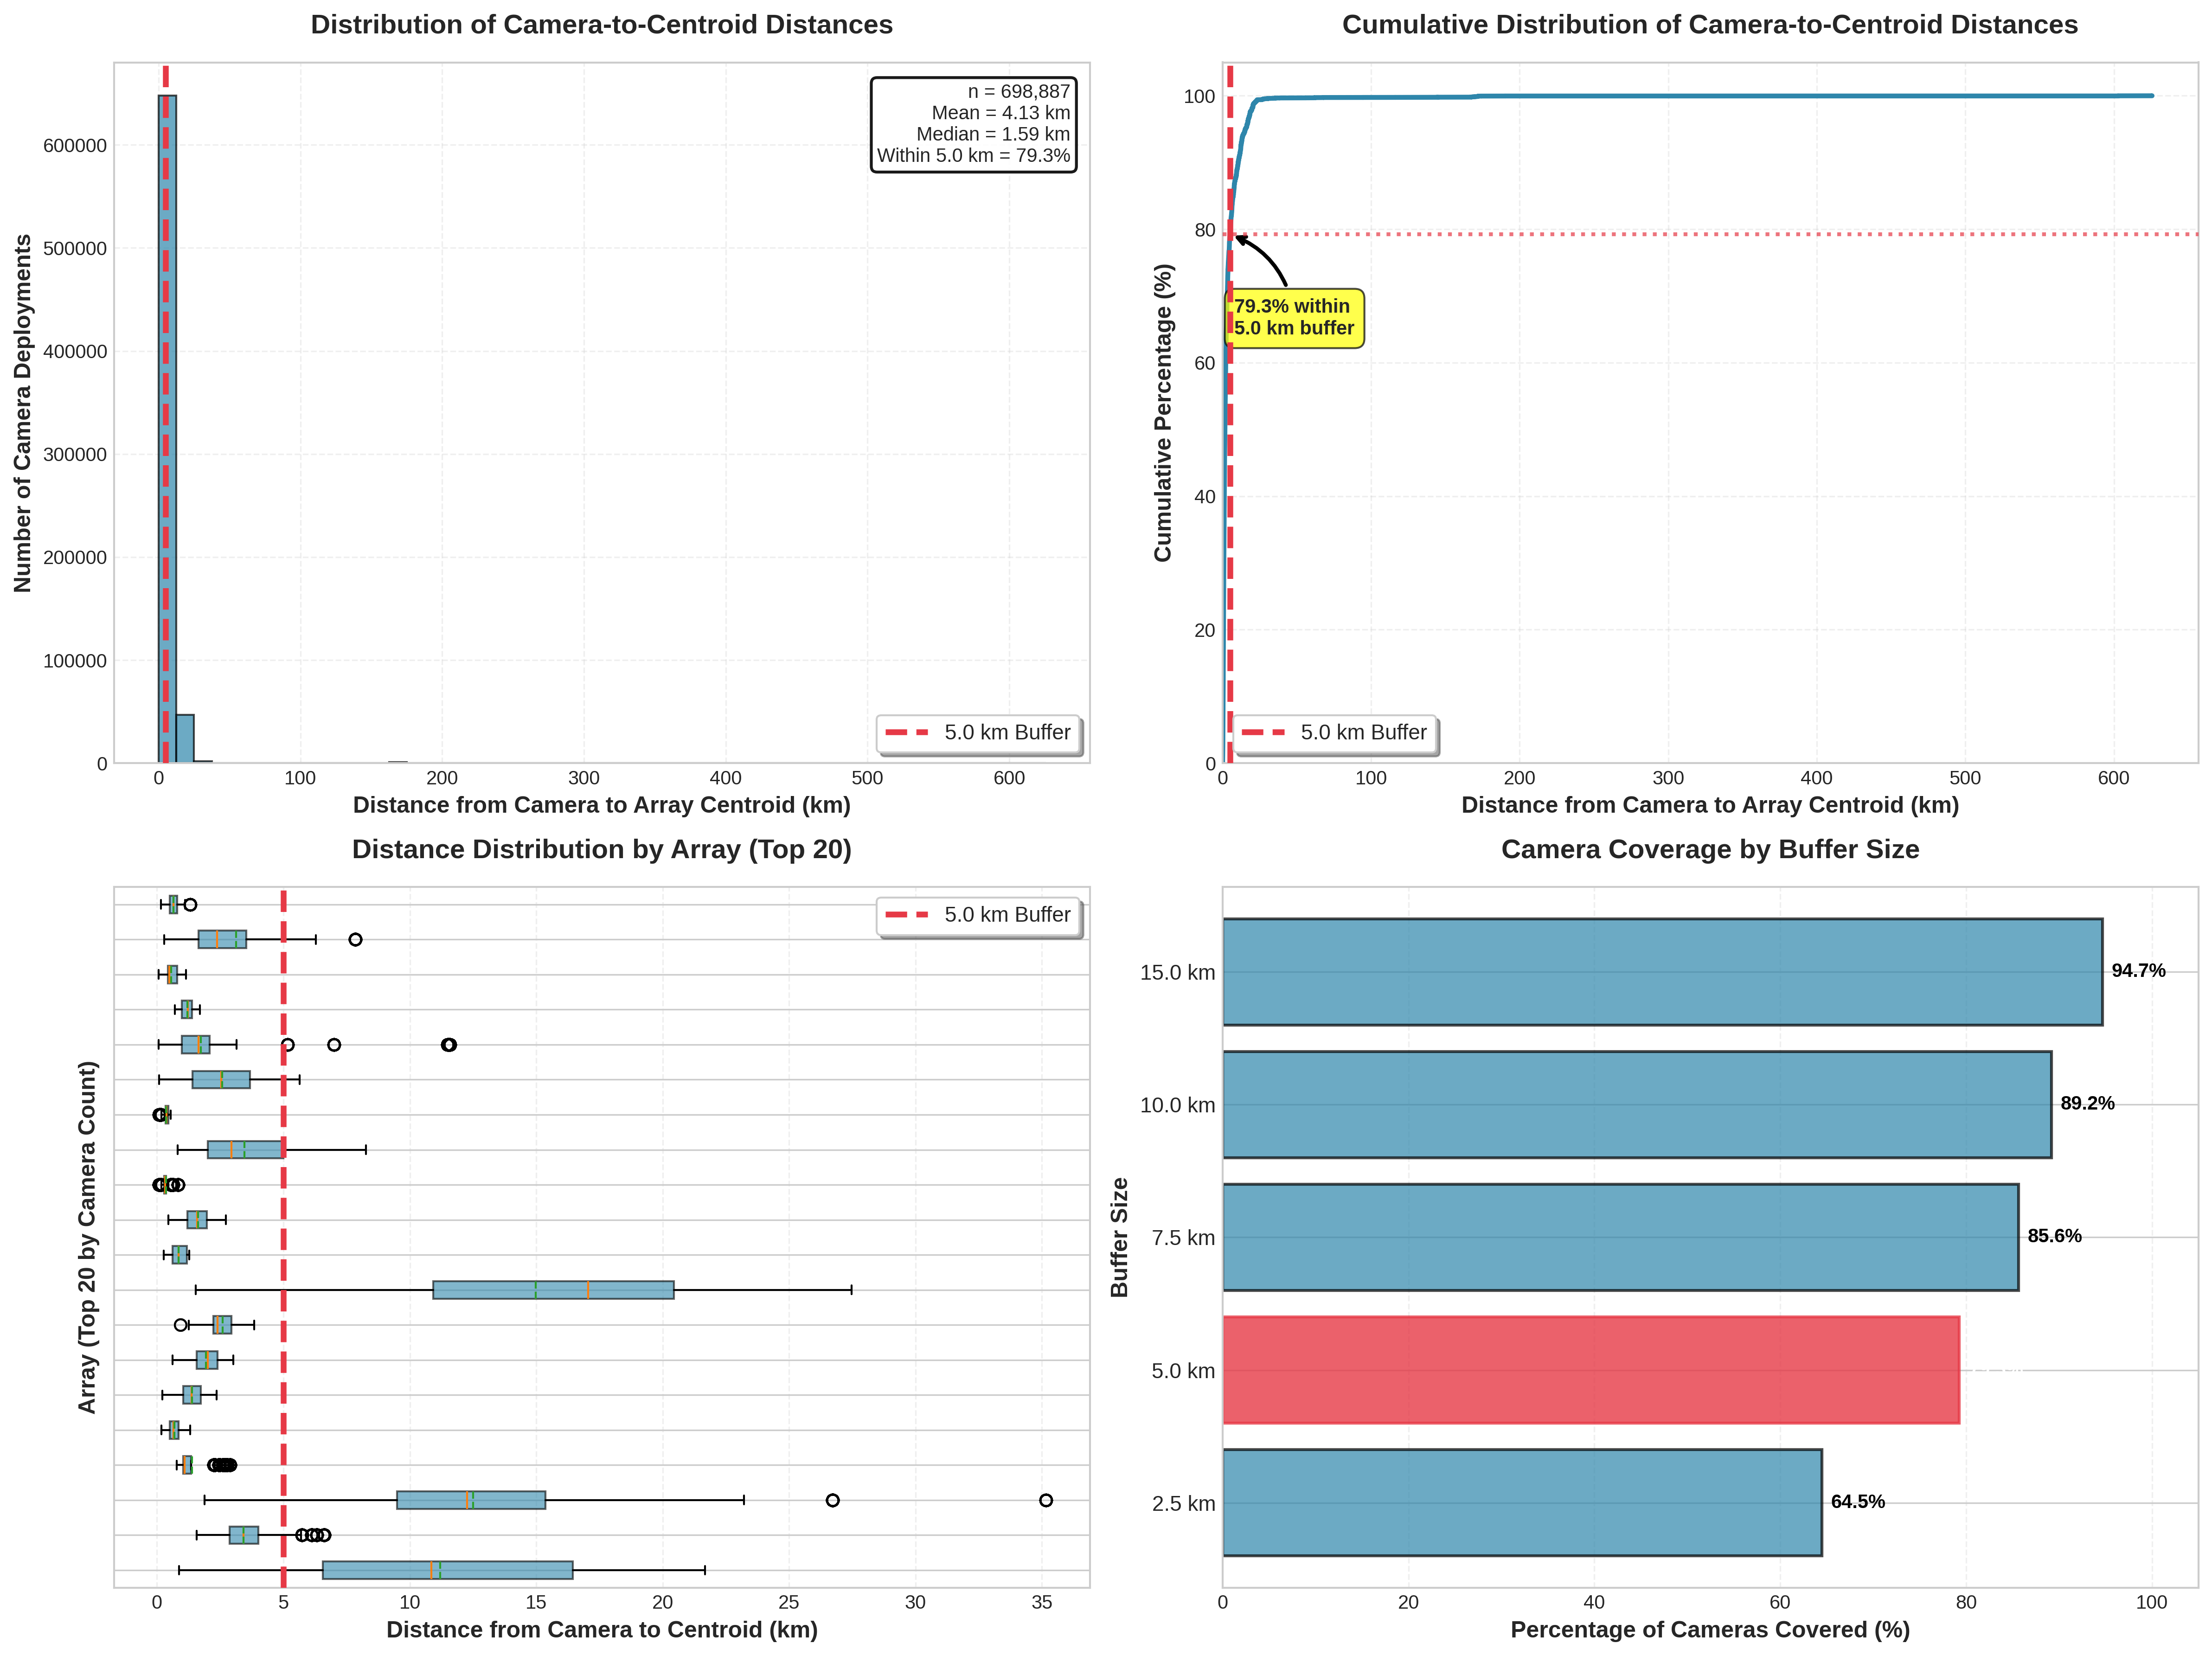

In [28]:
# ----------------------------
# Distance Analysis: Camera Deployments to Array Centroids
# Validate buffer area for Snapshot USA data
# ----------------------------

# Create a mapping of array to centroid coordinates
array_centroids = gdf_arrays_m[[array_col, 'centroid']].copy()
array_centroids = array_centroids.rename(columns={'centroid': 'array_centroid'})

# Merge points with their array centroids
gdf_points_with_centroids = gdf_points_m.merge(
    array_centroids, 
    on=array_col, 
    how='left'
)

# Calculate distance from each camera point to its array centroid (in meters)
from shapely.geometry import Point

def calculate_distance(row):
    """Calculate distance between point and its array centroid"""
    point_geom = row['geometry']
    centroid_geom = row['array_centroid']
    if point_geom is not None and centroid_geom is not None:
        return point_geom.distance(centroid_geom)
    return np.nan

# Calculate distances (in meters)
gdf_points_with_centroids['distance_m'] = gdf_points_with_centroids.apply(
    calculate_distance, axis=1
)

# Convert to kilometers
gdf_points_with_centroids['distance_km'] = gdf_points_with_centroids['distance_m'] / 1000.0

# Remove any NaN distances
valid_distances = gdf_points_with_centroids.dropna(subset=['distance_km'])

# Summary statistics
print("="*70)
print("DISTANCE ANALYSIS: CAMERA DEPLOYMENTS TO ARRAY CENTROIDS")
print("="*70)
print(f"Total deployment cameras analyzed: {len(valid_distances):,}")
print(f"Number of arrays: {valid_distances[array_col].nunique()}")
print(f"\nDistance Statistics (km):")
print(f"  Mean:     {valid_distances['distance_km'].mean():.3f} km")
print(f"  Median:   {valid_distances['distance_km'].median():.3f} km")
print(f"  Std Dev:  {valid_distances['distance_km'].std():.3f} km")
print(f"  Min:      {valid_distances['distance_km'].min():.3f} km")
print(f"  Max:      {valid_distances['distance_km'].max():.3f} km")
print(f"\nPercentiles:")
print(f"  25th:     {valid_distances['distance_km'].quantile(0.25):.3f} km")
print(f"  50th:     {valid_distances['distance_km'].quantile(0.50):.3f} km")
print(f"  75th:     {valid_distances['distance_km'].quantile(0.75):.3f} km")
print(f"  95th:     {valid_distances['distance_km'].quantile(0.95):.3f} km")
print(f"  99th:     {valid_distances['distance_km'].quantile(0.99):.3f} km")

# Validate buffer
within_buffer = valid_distances['distance_km'] <= buffer_km
print(f"\n{buffer_km} km Buffer Validation:")
print(f"  Cameras within {buffer_km} km: {within_buffer.sum():,} ({100*within_buffer.mean():.2f}%)")
print(f"  Cameras beyond {buffer_km} km: {(~within_buffer).sum():,} ({100*(~within_buffer).mean():.2f}%)")

# Check other buffer sizes
buffer_sizes = [2.5, 5.0, 7.5, 10.0, 15.0]
print(f"\nCoverage by Different Buffer Sizes:")
for buffer_size in buffer_sizes:
    within = valid_distances['distance_km'] <= buffer_size
    print(f"  {buffer_size:5.1f} km: {within.sum():6,} cameras ({100*within.mean():6.2f}%)")

print("="*70)

# ----------------------------
# Visualization: Distribution of Distances
# ----------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=300)

# 1. Histogram with buffer line
ax1 = axes[0, 0]
n, bins, patches = ax1.hist(valid_distances['distance_km'], bins=50, 
                            edgecolor='black', alpha=0.7, color='#2E86AB')
ax1.axvline(buffer_km, color='#E63946', linewidth=3, linestyle='--', 
           label=f'{buffer_km:.1f} km Buffer', zorder=5)
ax1.set_xlabel('Distance from Camera to Array Centroid (km)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Camera Deployments', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Camera-to-Centroid Distances', fontsize=14, fontweight='bold', pad=15)
ax1.legend(fontsize=11, frameon=True, shadow=True)
ax1.grid(True, alpha=0.3, linestyle='--')

# Add statistics box
stats_text = f'n = {len(valid_distances):,}\nMean = {valid_distances["distance_km"].mean():.2f} km\nMedian = {valid_distances["distance_km"].median():.2f} km\nWithin {buffer_km:.1f} km = {100*within_buffer.mean():.1f}%'
ax1.text(0.98, 0.97, stats_text, transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='black', linewidth=1.5))

# 2. Cumulative distribution
ax2 = axes[0, 1]
sorted_distances = np.sort(valid_distances['distance_km'])
cumulative = np.arange(1, len(sorted_distances) + 1) / len(sorted_distances) * 100
ax2.plot(sorted_distances, cumulative, linewidth=2.5, color='#2E86AB')
ax2.axvline(buffer_km, color='#E63946', linewidth=3, linestyle='--', 
           label=f'{buffer_km:.1f} km Buffer', zorder=5)
ax2.axhline(100*within_buffer.mean(), color='#E63946', linewidth=2, 
           linestyle=':', alpha=0.7, zorder=4)
ax2.set_xlabel('Distance from Camera to Array Centroid (km)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=12, fontweight='bold')
ax2.set_title('Cumulative Distribution of Camera-to-Centroid Distances', 
             fontsize=14, fontweight='bold', pad=15)
ax2.legend(fontsize=11, frameon=True, shadow=True)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xlim(left=0)
ax2.set_ylim([0, 105])

# Add annotation
pct_within = 100*within_buffer.mean()
ax2.annotate(f'{pct_within:.1f}% within\n{buffer_km:.1f} km buffer',
            xy=(buffer_km, pct_within), xytext=(buffer_km + 3, pct_within - 15),
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', 
                          color='black', lw=2))

# 3. Box plot by array (showing top arrays by camera count)
ax3 = axes[1, 0]
top_arrays = valid_distances[array_col].value_counts().head(20).index
df_top = valid_distances[valid_distances[array_col].isin(top_arrays)]
box_data = [df_top[df_top[array_col] == arr]['distance_km'].values for arr in top_arrays]
bp = ax3.boxplot(box_data, vert=False, patch_artist=True, 
                showmeans=True, meanline=True)
for patch in bp['boxes']:
    patch.set_facecolor('#2E86AB')
    patch.set_alpha(0.6)
ax3.axvline(buffer_km, color='#E63946', linewidth=3, linestyle='--', 
           label=f'{buffer_km:.1f} km Buffer', zorder=5)
ax3.set_xlabel('Distance from Camera to Centroid (km)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Array (Top 20 by Camera Count)', fontsize=12, fontweight='bold')
ax3.set_title('Distance Distribution by Array (Top 20)', fontsize=14, fontweight='bold', pad=15)
ax3.set_yticklabels([])  # Hide array names for clarity
ax3.legend(fontsize=11, frameon=True, shadow=True)
ax3.grid(True, alpha=0.3, linestyle='--', axis='x')

# 4. Buffer coverage comparison
ax4 = axes[1, 1]
buffer_coverage = []
for buffer_size in buffer_sizes:
    within = (valid_distances['distance_km'] <= buffer_size).mean() * 100
    buffer_coverage.append(within)

bars = ax4.barh(range(len(buffer_sizes)), buffer_coverage, color='#2E86AB', 
               edgecolor='black', linewidth=1.5, alpha=0.7)
# Highlight the current buffer_km value if it's in the list
if buffer_km in buffer_sizes:
    highlight_idx = buffer_sizes.index(buffer_km)
    bars[highlight_idx].set_color('#E63946')
    bars[highlight_idx].set_alpha(0.8)

ax4.set_yticks(range(len(buffer_sizes)))
ax4.set_yticklabels([f'{b:.1f} km' for b in buffer_sizes], fontsize=11)
ax4.set_xlabel('Percentage of Cameras Covered (%)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Buffer Size', fontsize=12, fontweight='bold')
ax4.set_title('Camera Coverage by Buffer Size', fontsize=14, fontweight='bold', pad=15)
ax4.set_xlim([0, 105])
ax4.grid(True, alpha=0.3, linestyle='--', axis='x')

# Add percentage labels
for i, (size, pct) in enumerate(zip(buffer_sizes, buffer_coverage)):
    # Use white text if this is the highlighted buffer, otherwise black
    color = 'white' if (buffer_km in buffer_sizes and i == buffer_sizes.index(buffer_km)) else 'black'
    ax4.text(pct + 1, i, f'{pct:.1f}%', va='center', fontsize=10, fontweight='bold', color=color)

plt.tight_layout()
plt.show()

Selected array for visualization: Herrera
Number of deployments: 36618


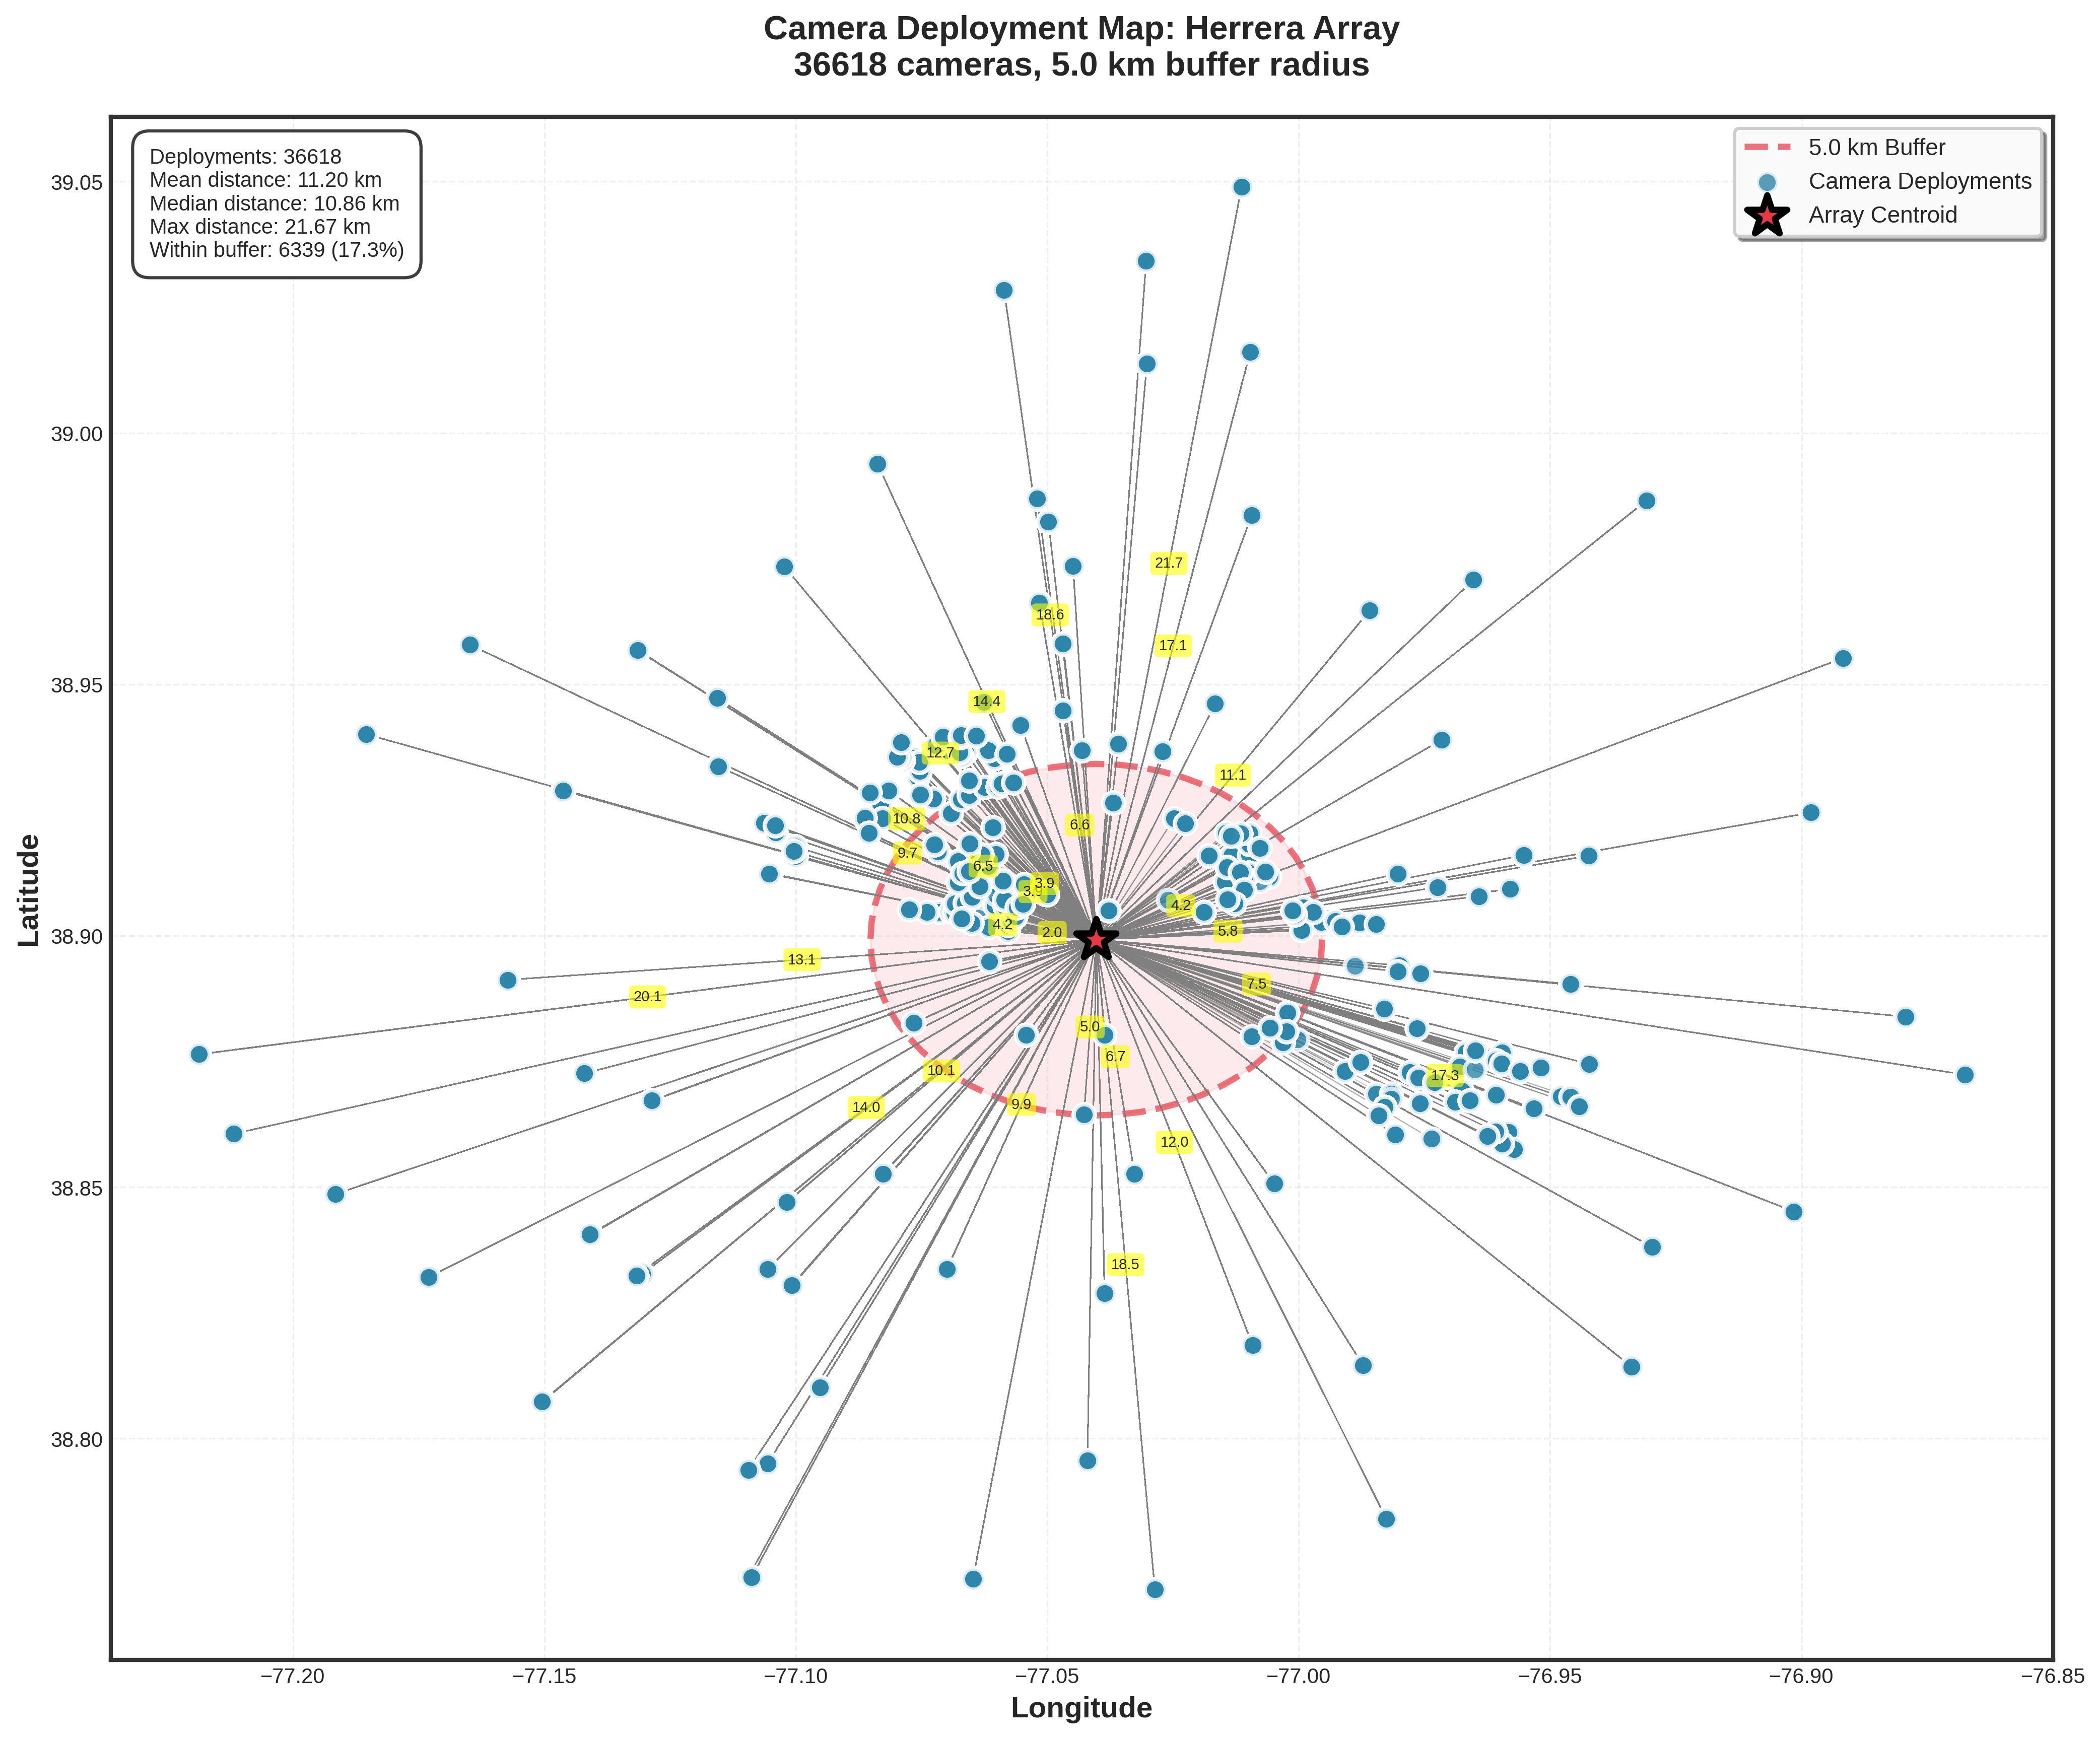

In [29]:
# ----------------------------
# Visualize Array with Most Deployment Cameras
# Show centroid, buffer circle, and distances
# ----------------------------

# Select the array with the most deployments for visualization
arrays_with_counts = valid_distances[array_col].value_counts()
selected_array = arrays_with_counts.index[0]  # Array with most deployments
num_deployments = arrays_with_counts.iloc[0]

print(f"Selected array for visualization: {selected_array}")
print(f"Number of deployments: {num_deployments}")

# Get all deployment points for this array
array_deployments = valid_distances[valid_distances[array_col] == selected_array].copy()
array_centroid = array_centroids[array_centroids[array_col] == selected_array].iloc[0]

# Convert back to WGS84 for plotting
deployments_wgs84 = array_deployments.to_crs("EPSG:4326")
centroid_wgs84 = gpd.GeoSeries([array_centroid['array_centroid']], crs=3857).to_crs("EPSG:4326")

# Extract coordinates
deploy_lons = deployments_wgs84.geometry.x
deploy_lats = deployments_wgs84.geometry.y
centroid_lon = centroid_wgs84.iloc[0].x
centroid_lat = centroid_wgs84.iloc[0].y

# Create buffer circle (in WGS84)
# Note: buffer in degrees is approximate; for accurate circle, use projected CRS and convert
centroid_point_m = array_centroid['array_centroid']
buffer_circle_m = centroid_point_m.buffer(buffer_km * 1000.0)  # buffer in meters
buffer_circle_wgs84 = gpd.GeoSeries([buffer_circle_m], crs=3857).to_crs("EPSG:4326").iloc[0]

# Create the map
fig, ax = plt.subplots(figsize=(14, 12), dpi=300)

# Plot buffer circle
if buffer_circle_wgs84.geom_type == 'Polygon':
    xs, ys = buffer_circle_wgs84.exterior.xy
    ax.plot(xs, ys, color='#E63946', linewidth=3, linestyle='--', 
            label=f'{buffer_km:.1f} km Buffer', zorder=1, alpha=0.7)
    ax.fill(xs, ys, color='#E63946', alpha=0.1, zorder=0)

# Plot deployment cameras
ax.scatter(deploy_lons, deploy_lats, s=100, c='#2E86AB', 
          edgecolors='white', linewidths=2, alpha=0.8, 
          label='Camera Deployments', zorder=3, marker='o')

# Plot centroid
ax.scatter(centroid_lon, centroid_lat, s=400, c='#E63946', 
          edgecolors='black', linewidths=3, alpha=1.0, 
          label='Array Centroid', zorder=4, marker='*')

# Draw lines from centroid to each deployment and add distance labels
for idx, row in deployments_wgs84.iterrows():
    deploy_lon = row.geometry.x
    deploy_lat = row.geometry.y
    distance_km = row['distance_km']
    
    # Draw line
    ax.plot([centroid_lon, deploy_lon], [centroid_lat, deploy_lat], 
            color='gray', linewidth=0.5, alpha=0.4, zorder=2)
    
    # Add distance label (at midpoint)
    mid_lon = (centroid_lon + deploy_lon) / 2
    mid_lat = (centroid_lat + deploy_lat) / 2
    
    # Only label every few points if there are many, to avoid clutter
    if len(deployments_wgs84) <= 30 or idx % max(1, len(deployments_wgs84) // 20) == 0:
        ax.text(mid_lon, mid_lat, f'{distance_km:.1f}', 
               fontsize=7, ha='center', va='center',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', 
                        alpha=0.6, edgecolor='none'))

# Set labels and title
ax.set_xlabel('Longitude', fontsize=14, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=14, fontweight='bold')
ax.set_title(f'Camera Deployment Map: {selected_array} Array\n'
            f'{len(array_deployments)} cameras, {buffer_km:.1f} km buffer radius',
            fontsize=16, fontweight='bold', pad=20)

# Add grid
ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.8)

# Add legend
legend = ax.legend(loc='best', frameon=True, fancybox=True, 
                  shadow=True, fontsize=11, framealpha=0.95)
legend.get_frame().set_linewidth(1.5)

# Add statistics box
stats_text = (f'Deployments: {len(array_deployments)}\n'
             f'Mean distance: {array_deployments["distance_km"].mean():.2f} km\n'
             f'Median distance: {array_deployments["distance_km"].median():.2f} km\n'
             f'Max distance: {array_deployments["distance_km"].max():.2f} km\n'
             f'Within buffer: {(array_deployments["distance_km"] <= buffer_km).sum()} '
             f'({100*(array_deployments["distance_km"] <= buffer_km).mean():.1f}%)')
props = dict(boxstyle='round,pad=0.8', facecolor='white', 
            edgecolor='#333333', linewidth=1.5, alpha=0.95)
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
       verticalalignment='top', bbox=props)

# Equal aspect ratio for proper map display
ax.set_aspect('equal', adjustable='box')

# Format plot borders
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('#333333')

plt.tight_layout()
plt.show()

In [30]:
# ----------------------------
# Point-buffer approach: build buffers + spatial join
# ----------------------------
gdf_point_buffers_m = gdf_points_m[[array_col, "geometry"]].copy()
gdf_point_buffers_m["geometry"] = gdf_point_buffers_m.geometry.buffer(point_buffer_km * 1000.0)
gdf_point_buffers_m = gdf_point_buffers_m[gdf_point_buffers_m.geometry.notnull() & ~gdf_point_buffers_m.geometry.is_empty].copy()

print(f"Point buffers ({point_buffer_km} km): {len(gdf_point_buffers_m)}")
print(f"Buffers bounds (m): {gdf_point_buffers_m.total_bounds}")

iucn_m = iucn.to_crs(3857)
iucn_m = iucn_m[iucn_m.geometry.notnull() & ~iucn_m.geometry.is_empty].copy()

iucn_in_point_buffers = gpd.sjoin(iucn_m, gdf_point_buffers_m, how="inner", predicate="intersects")
if iucn_in_point_buffers.empty:
    raise ValueError("No IUCN polygons intersected deployment buffers.")

Point buffers (1.0 km): 698887
Buffers bounds (m): [-16963632.46253818   2837311.33584858  -7636807.61086006
   8279868.54014491]


In [31]:
# ----------------------------
# Debug: check for duplicate index alignment issues
# ----------------------------
print("Index unique:", iucn_in_point_buffers.index.is_unique)
print("Array index unique:", iucn_in_point_buffers[array_col].index.is_unique)
print("Species index unique:", iucn_in_point_buffers["Sci_Name"].index.is_unique)
print("Duplicate index count:", iucn_in_point_buffers.index.duplicated().sum())
print("Rows:", len(iucn_in_point_buffers))

Index unique: False
Array index unique: False
Species index unique: False
Duplicate index count: 30367780
Rows: 30368103


In [32]:
# ----------------------------
# Rebuild point-buffer crosstab without index alignment
# ----------------------------
iucn_in_point_buffers_clean = iucn_in_point_buffers.reset_index(drop=True)

array_series = iucn_in_point_buffers_clean[array_col].to_numpy()
species_series = iucn_in_point_buffers_clean["Sci_Name"].to_numpy()

array_species_iucn_pointbuffer = pd.crosstab(array_series, species_series)
array_species_iucn_pointbuffer = (array_species_iucn_pointbuffer > 0).astype(int)

print(f"Arrays with IUCN point-buffer species: {array_species_iucn_pointbuffer.shape[0]}")
print(f"Unique IUCN species (point-buffer): {array_species_iucn_pointbuffer.shape[1]}")

Arrays with IUCN point-buffer species: 260
Unique IUCN species (point-buffer): 303


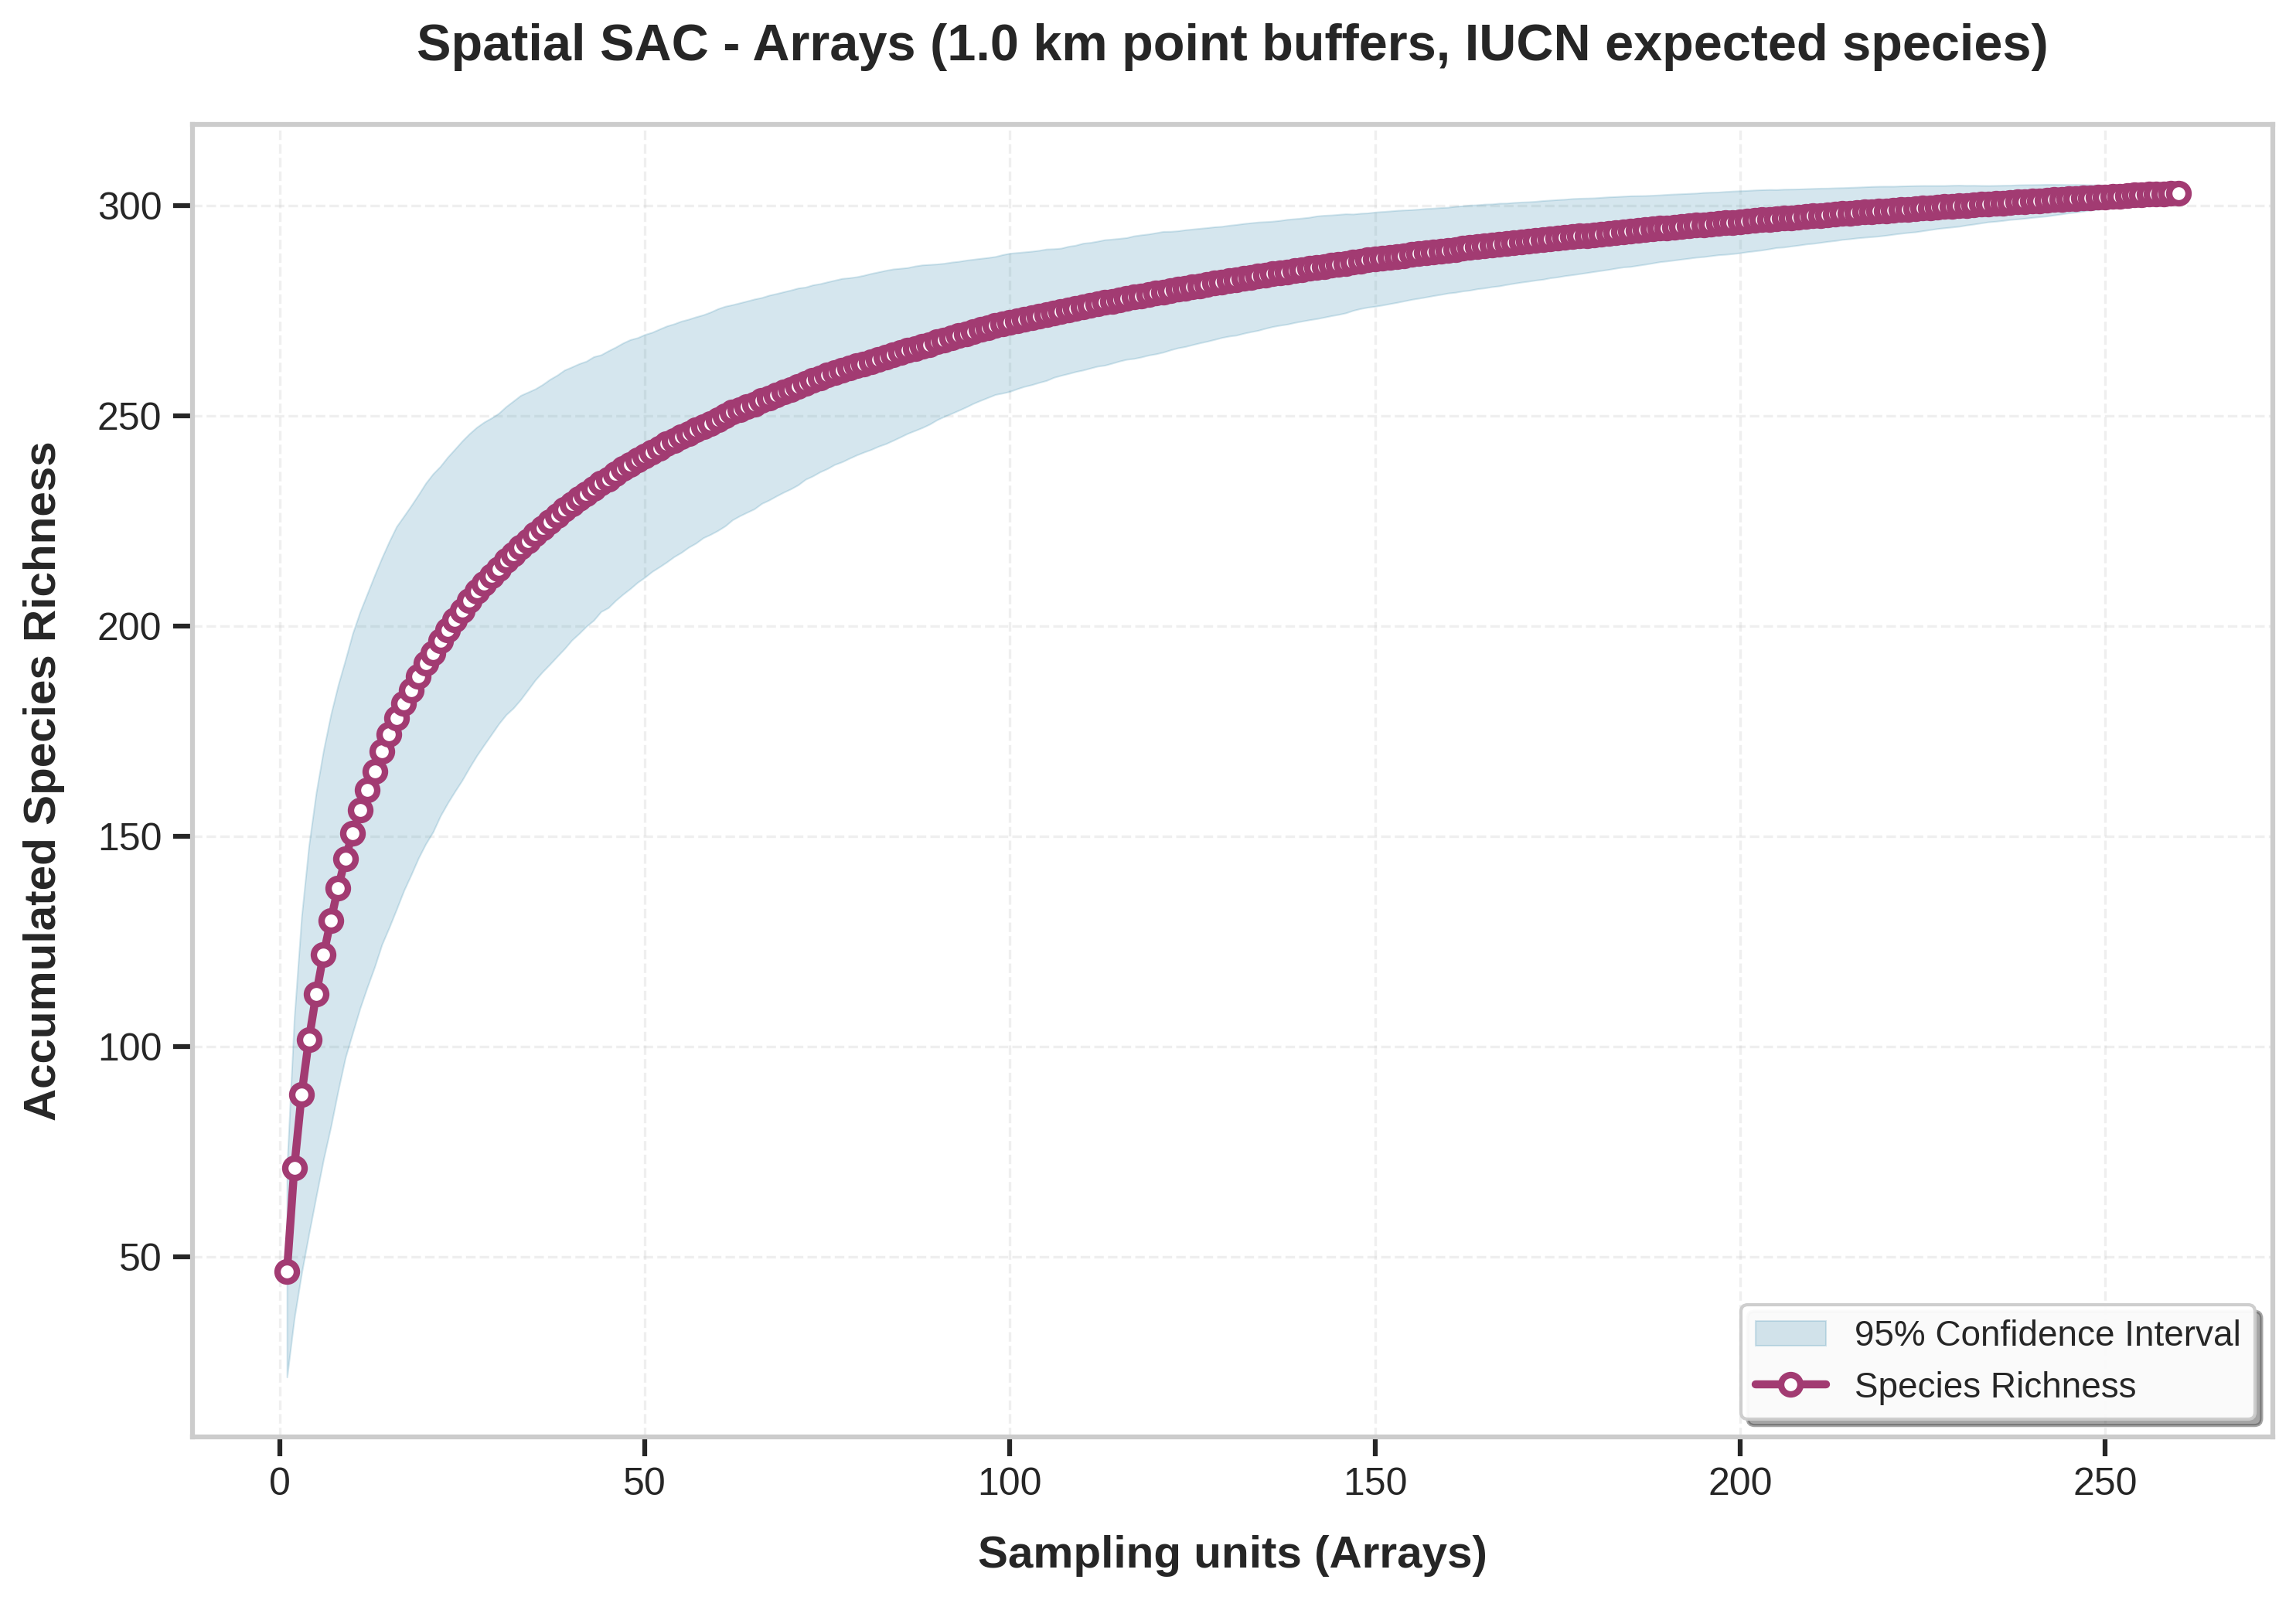

In [33]:
# ----------------------------
# Scenario 2 (point-buffer): IUCN-predicted species by array
# ----------------------------
acc_arrays_iucn_pointbuffer = species_accumulation(
    array_species_iucn_pointbuffer,
    method="random",
    permutations=1000,
 )
plot_sac(
    acc_arrays_iucn_pointbuffer,
    title=f"Spatial SAC - Arrays ({point_buffer_km} km point buffers, IUCN expected species)",
    xlabel="Sampling units (Arrays)",
)

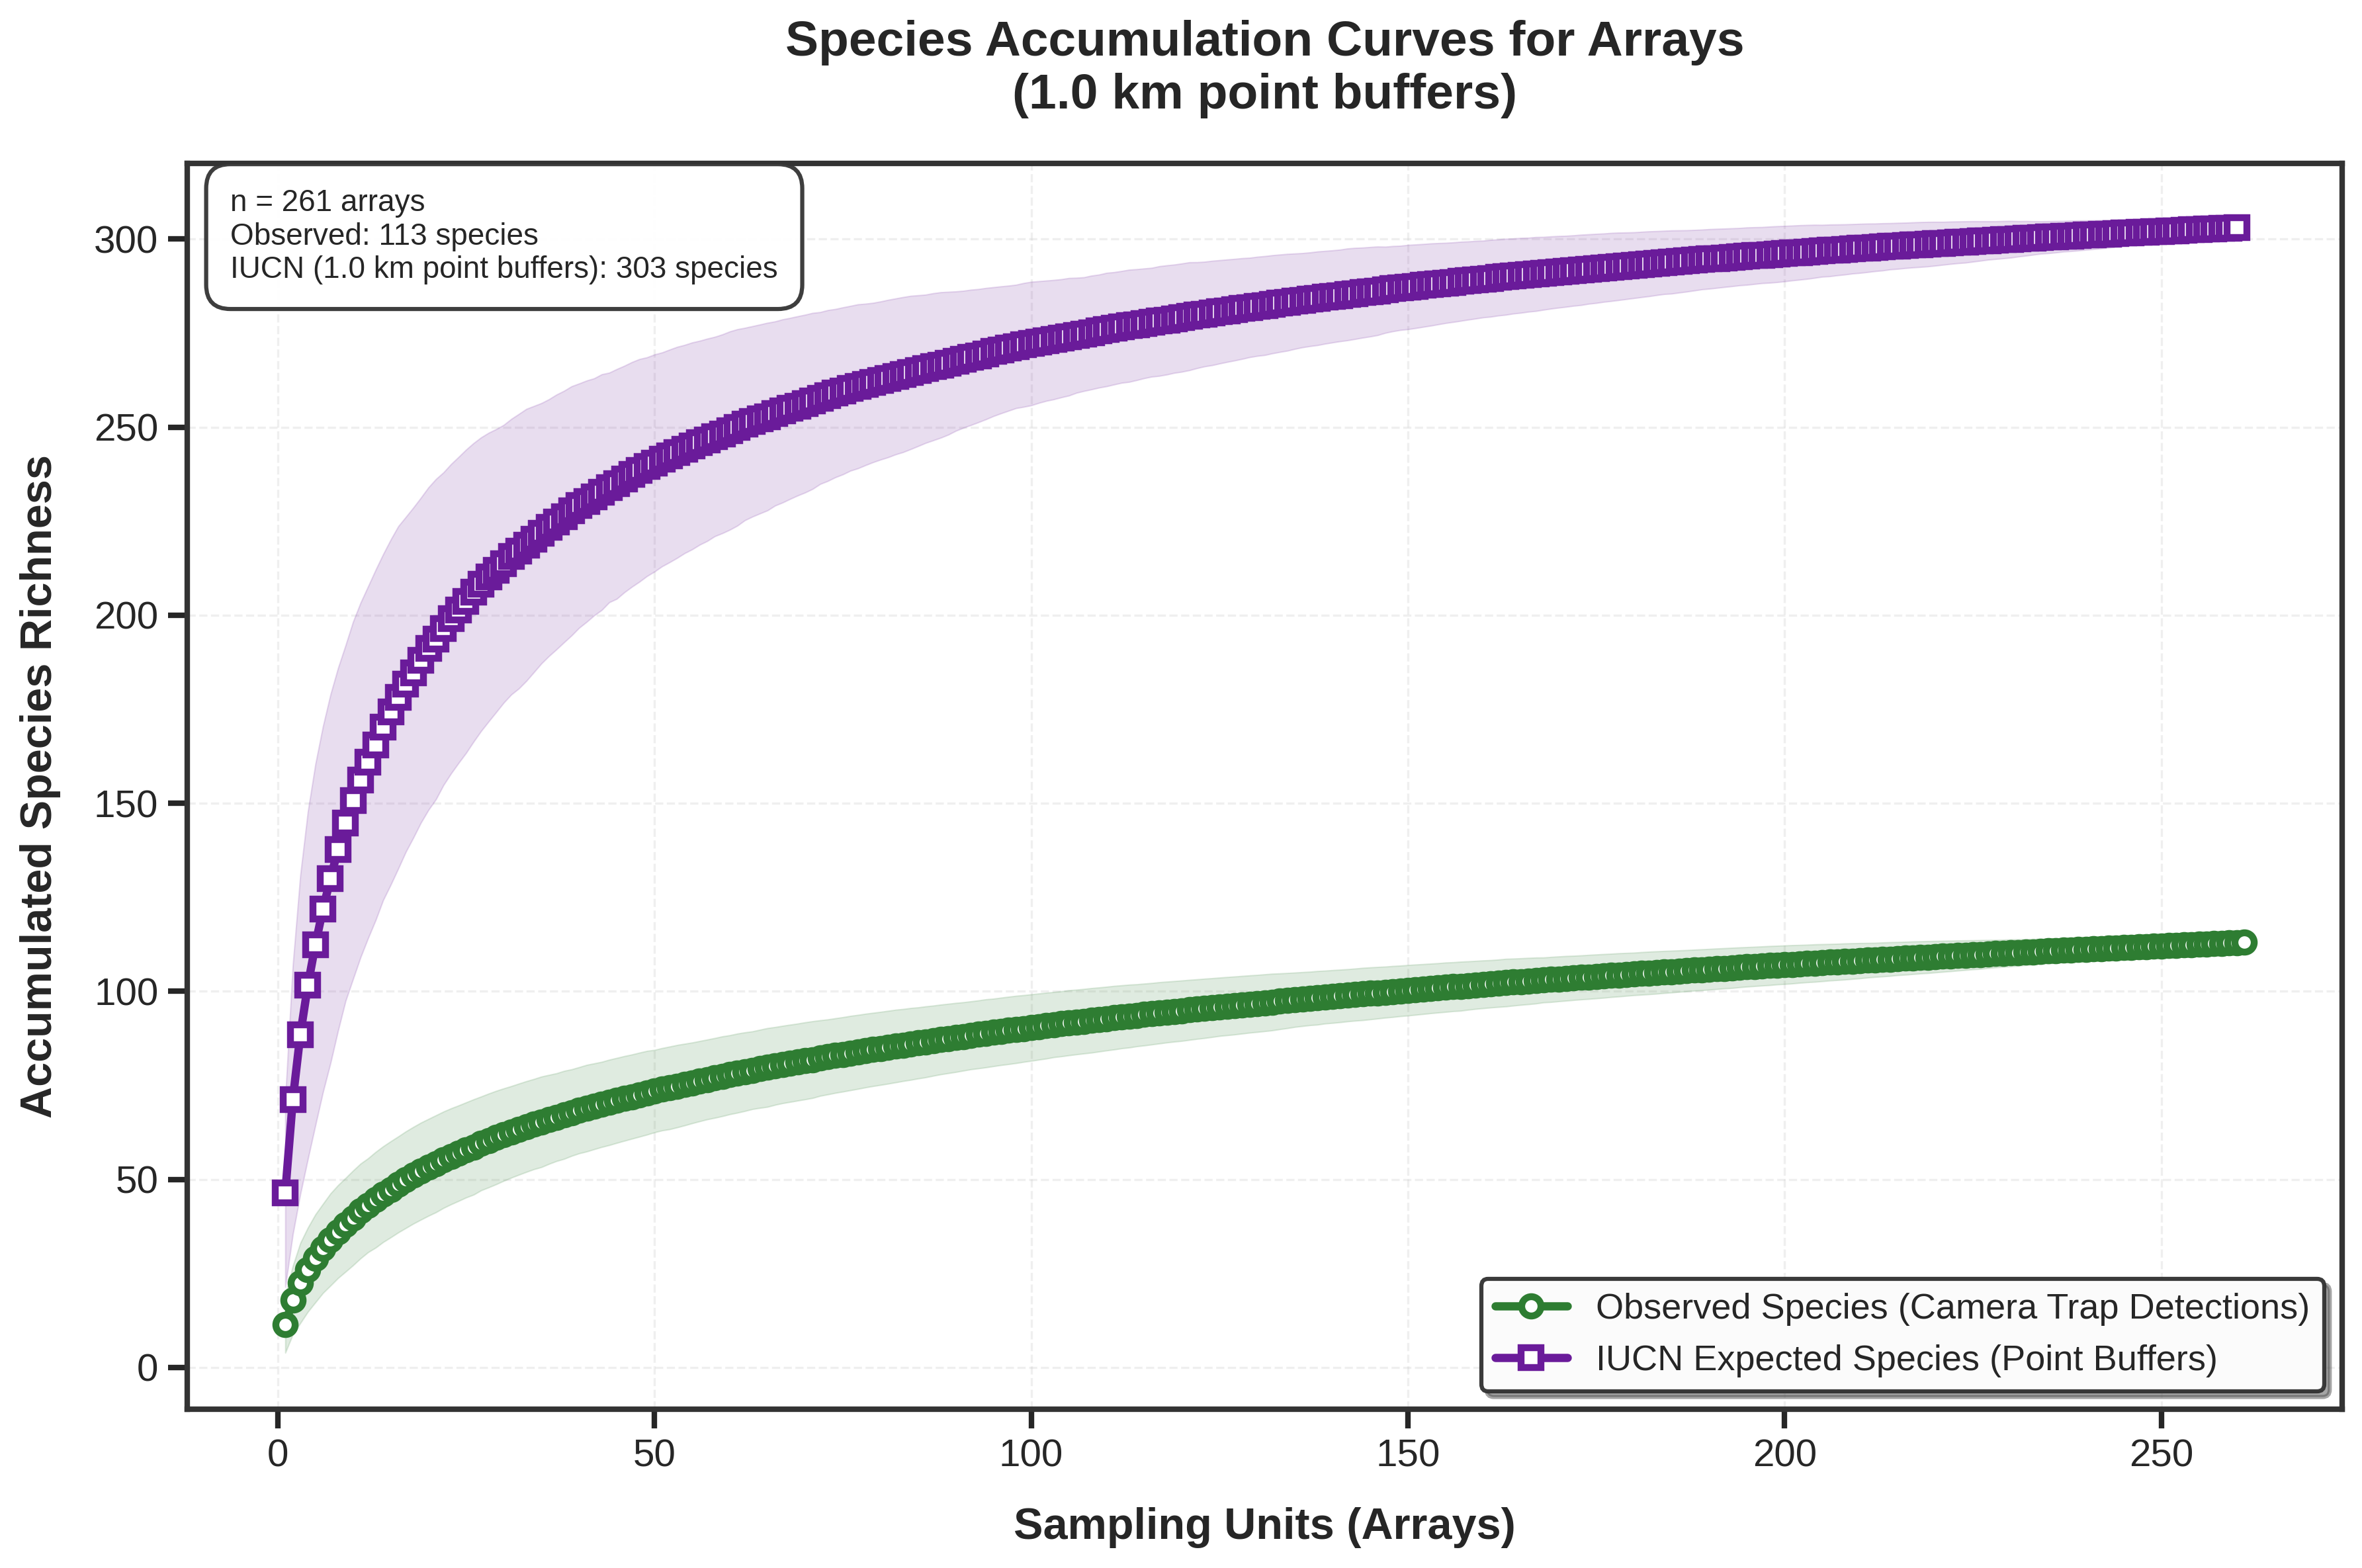


SUMMARY STATISTICS (POINT-BUFFER)
Sampling units (arrays): 261
Point buffer radius: 1.0 km

Observed Species (Camera Trap Detections):
  Total richness: 113
  Final SD: 0.00

IUCN Expected Species (Point Buffers):
  Total richness: 303
  Final SD: 0.00

Detection Gap (IUCN - Observed): 190 species


In [34]:
# ----------------------------
# Combined SAC Plot: Observed vs IUCN (point-buffer)
# ----------------------------
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
plt.style.use('seaborn-v0_8-whitegrid')

# Observed species from camera trap detections
x1 = acc_arrays['sites']
y1 = acc_arrays['richness']
sd1 = acc_arrays['sd']

if sd1 is not None and np.any(sd1 > 0):
    ax.fill_between(x1, y1 - 2*sd1, y1 + 2*sd1,
                    color='#2E7D32', alpha=0.15,
                    edgecolor='#2E7D32', linewidth=0.5)

ax.plot(x1, y1, color='#2E7D32', linewidth=3,
        marker='o', markersize=7, markerfacecolor='white',
        markeredgewidth=2.5, markeredgecolor='#2E7D32',
        label='Observed Species (Camera Trap Detections)', zorder=3)

# IUCN expected species from point buffers
x2 = acc_arrays_iucn_pointbuffer['sites']
y2 = acc_arrays_iucn_pointbuffer['richness']
sd2 = acc_arrays_iucn_pointbuffer['sd']

if sd2 is not None and np.any(sd2 > 0):
    ax.fill_between(x2, y2 - 2*sd2, y2 + 2*sd2,
                    color='#6A1B9A', alpha=0.15,
                    edgecolor='#6A1B9A', linewidth=0.5)

ax.plot(x2, y2, color='#6A1B9A', linewidth=3,
        marker='s', markersize=7, markerfacecolor='white',
        markeredgewidth=2.5, markeredgecolor='#6A1B9A',
        label='IUCN Expected Species (Point Buffers)', zorder=3)

ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.8, zorder=0)
ax.set_axisbelow(True)

ax.set_xlabel('Sampling Units (Arrays)', fontsize=16, fontweight='bold', labelpad=12)
ax.set_ylabel('Accumulated Species Richness', fontsize=16, fontweight='bold', labelpad=12)
ax.set_title(f'Species Accumulation Curves for Arrays\n({point_buffer_km} km point buffers)',
             fontsize=18, fontweight='bold', pad=20)

ax.tick_params(axis='both', which='major', labelsize=14, length=7, width=2)

legend = ax.legend(loc='lower right', frameon=True, fancybox=True,
                   shadow=True, fontsize=13, framealpha=0.97,
                   edgecolor='#333333', facecolor='white')
legend.get_frame().set_linewidth(1.5)

for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('#333333')

textstr = (
    f'n = {array_species_observed.shape[0]} arrays\n'
    f'Observed: {array_species_observed.shape[1]} species\n'
    f'IUCN ({point_buffer_km} km point buffers): {array_species_iucn_pointbuffer.shape[1]} species'
 )
props = dict(boxstyle='round,pad=0.8', facecolor='white', edgecolor='#333333', linewidth=1.5, alpha=0.95)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS (POINT-BUFFER)")
print("="*60)
print(f"Sampling units (arrays): {array_species_observed.shape[0]}")
print(f"Point buffer radius: {point_buffer_km} km")
print("\nObserved Species (Camera Trap Detections):")
print(f"  Total richness: {acc_arrays['richness'][-1]:.0f}")
print(f"  Final SD: {acc_arrays['sd'][-1]:.2f}")
print("\nIUCN Expected Species (Point Buffers):")
print(f"  Total richness: {acc_arrays_iucn_pointbuffer['richness'][-1]:.0f}")
print(f"  Final SD: {acc_arrays_iucn_pointbuffer['sd'][-1]:.2f}")
print(f"\nDetection Gap (IUCN - Observed): {acc_arrays_iucn_pointbuffer['richness'][-1] - acc_arrays['richness'][-1]:.0f} species")
print("="*60)

In [35]:
# ----------------------------
# Compare centroid vs point-buffer species lists
# ----------------------------
# Build species sets from each method
species_centroid = set(array_species_iucn.columns.astype(str))
species_pointbuffer = set(array_species_iucn_pointbuffer.columns.astype(str))

missing_from_centroid = sorted(species_pointbuffer - species_centroid)
missing_from_pointbuffer = sorted(species_centroid - species_pointbuffer)
shared_species = sorted(species_centroid & species_pointbuffer)

print(f"Centroid species: {len(species_centroid)}")
print(f"Point-buffer species: {len(species_pointbuffer)}")
print(f"Missing from centroid: {len(missing_from_centroid)}")
print(f"Missing from point-buffer: {len(missing_from_pointbuffer)}")

Centroid species: 298
Point-buffer species: 303
Missing from centroid: 5
Missing from point-buffer: 0


In [36]:
# ----------------------------
# Display species lists (scientific names only)
# ----------------------------
df_missing_centroid = pd.DataFrame({"Sci_Name": missing_from_centroid})
df_missing_pointbuffer = pd.DataFrame({"Sci_Name": missing_from_pointbuffer})
df_shared = pd.DataFrame({"Sci_Name": shared_species})

print("Missing from centroid (present in point-buffer):")
display(df_missing_centroid)

print("Missing from point-buffer (present in centroid):")
display(df_missing_pointbuffer)


Missing from centroid (present in point-buffer):


Sci_Name
0     marmota olympus
1   ochotona collaris
2  sorex neomexicanus
3      sorex tenellus
4  urocitellus mollis

Missing from point-buffer (present in centroid):


Empty DataFrame
Columns: [Sci_Name]
Index: []

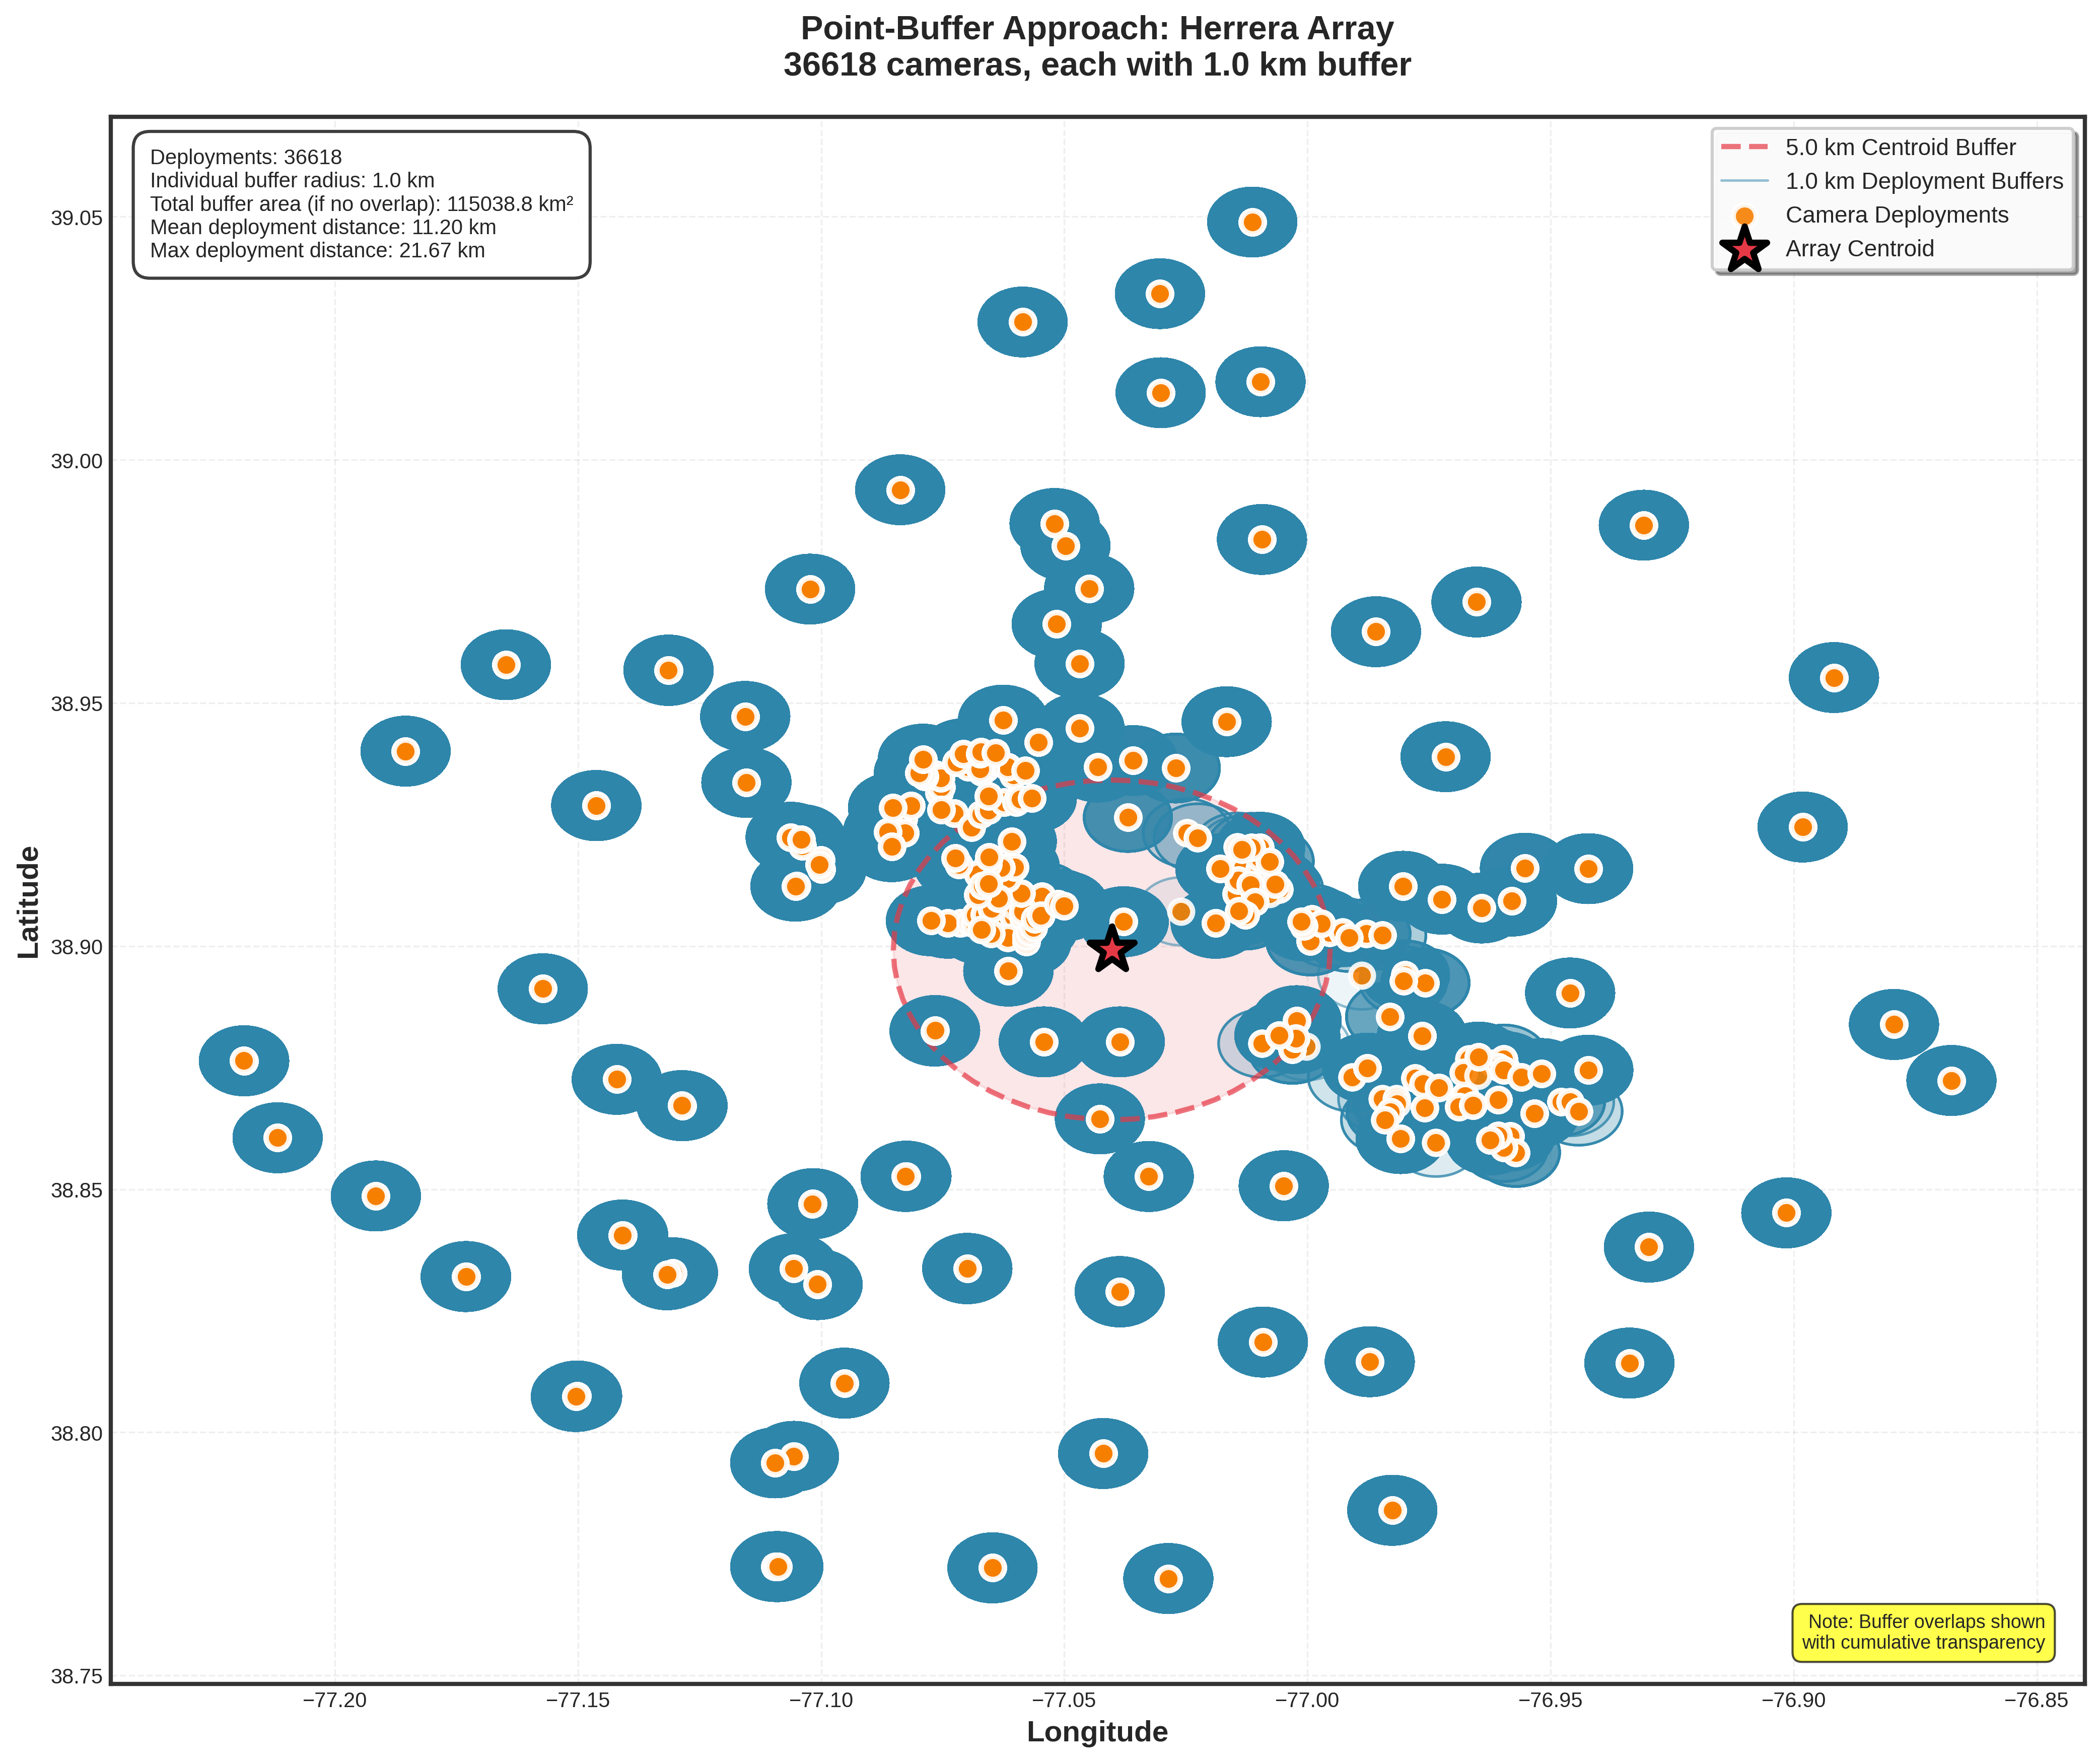

In [37]:
# ----------------------------
# Visualize Point-Buffer Approach: Individual Buffers Around Each Deployment
# Show all deployment buffers + centroid (no centroid buffer)
# ----------------------------

# Use the same selected array from previous visualization
array_deployments_for_buffers = valid_distances[valid_distances[array_col] == selected_array].copy()

# Convert to WGS84 for plotting
deployments_wgs84_buffers = array_deployments_for_buffers.to_crs("EPSG:4326")
centroid_wgs84_point = gpd.GeoSeries([array_centroid['array_centroid']], crs=3857).to_crs("EPSG:4326")

# Extract coordinates
deploy_lons = deployments_wgs84_buffers.geometry.x
deploy_lats = deployments_wgs84_buffers.geometry.y
centroid_lon = centroid_wgs84_point.iloc[0].x
centroid_lat = centroid_wgs84_point.iloc[0].y

# Create individual buffer circles for each deployment (in WGS84)
deployment_buffers_list = []
for idx, row in array_deployments_for_buffers.iterrows():
    point_m = row['geometry']  # Already in EPSG:3857
    buffer_m = point_m.buffer(point_buffer_km * 1000.0)
    deployment_buffers_list.append(buffer_m)

# Convert all buffers to WGS84
deployment_buffers_wgs84 = gpd.GeoSeries(deployment_buffers_list, crs=3857).to_crs("EPSG:4326")

# Create centroid buffer for comparison (same as previous visualization)
centroid_point_m = array_centroid['array_centroid']
centroid_buffer_m = centroid_point_m.buffer(buffer_km * 1000.0)
centroid_buffer_wgs84 = gpd.GeoSeries([centroid_buffer_m], crs=3857).to_crs("EPSG:4326").iloc[0]

# Create the map
fig, ax = plt.subplots(figsize=(14, 12), dpi=300)

# Plot centroid buffer circle (single circle approach) in red/pink
if centroid_buffer_wgs84.geom_type == 'Polygon':
    xs, ys = centroid_buffer_wgs84.exterior.xy
    ax.fill(xs, ys, color='#E63946', alpha=0.12, zorder=1)
    ax.plot(xs, ys, color='#E63946', linewidth=2.5, alpha=0.7, 
            linestyle='--', label=f'{buffer_km:.1f} km Centroid Buffer', zorder=3)

# Plot individual deployment buffer circles with transparency
for buffer_geom in deployment_buffers_wgs84:
    if buffer_geom.geom_type == 'Polygon':
        xs, ys = buffer_geom.exterior.xy
        # Use high transparency (alpha=0.08) for fill to show overlaps
        # Use visible edge color to distinguish individual circles
        ax.fill(xs, ys, color='#2E86AB', alpha=0.08, zorder=1)
        ax.plot(xs, ys, color='#2E86AB', linewidth=1.2, alpha=0.5, 
                linestyle='-', zorder=2)

# Add a single legend entry for buffers (plot one separately)
if len(deployment_buffers_wgs84) > 0 and deployment_buffers_wgs84.iloc[0].geom_type == 'Polygon':
    xs, ys = deployment_buffers_wgs84.iloc[0].exterior.xy
    ax.plot(xs, ys, color='#2E86AB', linewidth=1.2, alpha=0.5, 
            label=f'{point_buffer_km:.1f} km Deployment Buffers', zorder=2)

# Plot deployment cameras
ax.scatter(deploy_lons, deploy_lats, s=120, c='#F77F00', 
          edgecolors='white', linewidths=2.5, alpha=0.9, 
          label='Camera Deployments', zorder=4, marker='o')

# Plot centroid (NO buffer circle around it)
ax.scatter(centroid_lon, centroid_lat, s=500, c='#E63946', 
          edgecolors='black', linewidths=3, alpha=1.0, 
          label='Array Centroid', zorder=5, marker='*')

# Set labels and title
ax.set_xlabel('Longitude', fontsize=14, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=14, fontweight='bold')
ax.set_title(f'Point-Buffer Approach: {selected_array} Array\n'
            f'{len(array_deployments_for_buffers)} cameras, each with {point_buffer_km:.1f} km buffer',
            fontsize=16, fontweight='bold', pad=20)

# Add grid
ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.8, zorder=0)

# Add legend
legend = ax.legend(loc='best', frameon=True, fancybox=True, 
                  shadow=True, fontsize=11, framealpha=0.95)
legend.get_frame().set_linewidth(1.5)

# Add statistics box
total_buffer_area_km2 = (np.pi * point_buffer_km**2) * len(array_deployments_for_buffers)
stats_text = (f'Deployments: {len(array_deployments_for_buffers)}\n'
             f'Individual buffer radius: {point_buffer_km:.1f} km\n'
             f'Total buffer area (if no overlap): {total_buffer_area_km2:.1f} km²\n'
             f'Mean deployment distance: {array_deployments_for_buffers["distance_km"].mean():.2f} km\n'
             f'Max deployment distance: {array_deployments_for_buffers["distance_km"].max():.2f} km')
props = dict(boxstyle='round,pad=0.8', facecolor='white', 
            edgecolor='#333333', linewidth=1.5, alpha=0.95)
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
       verticalalignment='top', bbox=props)

# Add note about overlaps
note_text = 'Note: Buffer overlaps shown\nwith cumulative transparency'
ax.text(0.98, 0.02, note_text, transform=ax.transAxes, fontsize=9,
       verticalalignment='bottom', horizontalalignment='right',
       bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', 
                alpha=0.7, edgecolor='black', linewidth=1))

# Equal aspect ratio for proper map display
ax.set_aspect('equal', adjustable='box')

# Format plot borders
for spine in ax.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('#333333')

plt.tight_layout()
plt.show()